In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import math as mt
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, matthews_corrcoef,cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.rod import ROD
from pyod.models.inne import INNE

from pyod.models.xgbod import XGBOD
from pyod.models.loda import LODA
from pyod.models.suod import SUOD

from pyod.models.so_gaal import SO_GAAL
from pyod.models.mo_gaal import MO_GAAL
from pyod.models.deep_svdd import DeepSVDD

from pyod.models.alad import ALAD
from pyod.models.rgraph import RGraph
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD
from pyod.models.anogan import AnoGAN

import lightgbm as lgbb

2023-06-28 14:26:58.414788: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-28 14:26:58.639055: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 14:26:59.316983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 14:26:59.318587: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 14:27:00.558392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df=pd.read_csv("/home/purobi/Desktop/index.csv")
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [4]:
# Columns holding categorical data:Creditability,Payment Status of Previous Credit,Purpose, Sex & Marital Status,
#     Guarantors,Type of apartment, Occupation, Foreign Worker
    
# Columns holding continuous data: Account Balance, Duration of Credit (month),Credit Amount,Value Savings/Stocks,
#     Length of current employment,Instalment per cent, Duration in Current address, Most valuable available asset,
#     Age (years),Concurrent Credits ,No of Credits at this Bank, No of dependents, Telephone 

In [5]:
df.duplicated().sum()


0

In [6]:
df.shape

(1000, 21)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0


In [8]:
df.isna().sum().sum()

0

In [9]:
categorical_features = df.select_dtypes(include=[np.object]).columns
df[categorical_features]

""
0
1
2
3
4
...
995
996
997
998


In [10]:
X = df.drop('Creditability', axis=1)
y = df[['Creditability']].copy()
scaler = MinMaxScaler(feature_range=(0,1))
rX = scaler.fit_transform(X)

In [11]:
X.columns

Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [12]:
Xn=pd.DataFrame(rX,columns=['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'])

In [13]:
Xn["Creditability"]=y
Xn

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
996,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
997,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
998,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [14]:
#1 KNN
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

knn=KNN(contamination=outliers_fraction) 
knn.fit(Xn,y)
# predict raw anomaly score
scores_pred = knn.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = knn.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : KNN")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yknn=pd.DataFrame(y_pred,columns=['out'])
df1=Xn.loc[yknn[yknn['out'] == 0].index]
df1 = df1.reset_index(drop=True)
df1

Outlier Detecter : KNN
Number of Outliers : 78 Number of Inliers : 922
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.088235,1.0,0.0,0.109552,0.00,0.25,0.000000,0.666667,0.0,...,0.000000,0.517857,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.333333,0.294118,0.5,0.1,0.678387,0.00,1.00,1.000000,0.333333,0.0,...,1.000000,0.446429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
918,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
919,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
920,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0


In [15]:
#2 ABOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

abod=ABOD(contamination=outliers_fraction)
abod.fit(Xn,y)
# predict raw anomaly score
scores_pred = abod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = abod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ABOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yabod=pd.DataFrame(y_pred,columns=['out'])
yabod
df2=Xn.loc[yabod[yabod['out'] == 0].index]
df2 = df2.reset_index(drop=True)
df2

Outlier Detecter : ABOD
Number of Outliers : 132 Number of Inliers : 868
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.088235,1.0,0.0,0.109552,0.00,0.25,0.000000,0.666667,0.0,...,0.000000,0.517857,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
864,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
865,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
866,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [16]:
#3 ECOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

ecod=ECOD(contamination=outliers_fraction)
ecod.fit(Xn,y)
# predict raw anomaly score
scores_pred = ecod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = ecod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ECOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yecod=pd.DataFrame(y_pred,columns=['out'])
df3=Xn.loc[yecod[yecod['out'] == 0].index]
df3 = df3.reset_index(drop=True)
df3

Outlier Detecter : ECOD
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
896,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
897,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
898,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [17]:
#4 COPOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

copod=COPOD(contamination=outliers_fraction)
copod.fit(Xn,y)
# predict raw anomaly score
scores_pred = copod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = copod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : COPOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
ycopod=pd.DataFrame(y_pred,columns=['out'])
df4=Xn.loc[ycopod[ycopod['out'] == 0].index]
df4 = df4.reset_index(drop=True)
df4

Outlier Detecter : COPOD
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
896,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
897,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
898,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0


In [18]:
#5 CBLOF
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

cblof=CBLOF(contamination=outliers_fraction)
cblof.fit(Xn,y)
# predict raw anomaly score
scores_pred = cblof.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = cblof.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : CBLOF")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
ycblof=pd.DataFrame(y_pred,columns=['out'])
df5=Xn.loc[ycblof[ycblof['out'] == 0].index]
df5 = df5.reset_index(drop=True)
df5

Outlier Detecter : CBLOF
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.058824,1.0,0.0,0.173214,0.00,0.75,0.000000,0.666667,0.0,...,0.000000,0.357143,1.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
4,1.000000,0.205882,1.0,0.3,0.046660,0.00,0.00,1.000000,0.333333,0.0,...,0.666667,0.821429,1.0,0.5,0.333333,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
896,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
897,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
898,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [19]:
#6 Feature Bagging
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

featurebagging=FeatureBagging(contamination=outliers_fraction)
featurebagging.fit(Xn,y)
# predict raw anomaly score
scores_pred = featurebagging.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = featurebagging.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : FEATUREBAGGING")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yfeaturebagging=pd.DataFrame(y_pred,columns=['out'])
yfeaturebagging
df6=Xn.loc[yfeaturebagging[yfeaturebagging['out'] == 0].index]
df6 = df6.reset_index(drop=True)
df6

Outlier Detecter : FEATUREBAGGING
Number of Outliers : 85 Number of Inliers : 915
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.088235,1.0,0.0,0.109552,0.00,0.25,0.000000,0.666667,0.0,...,0.000000,0.517857,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
911,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
912,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
913,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [20]:
#7 Isolation Forest
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

iforest=IForest(contamination=outliers_fraction)
iforest.fit(Xn,y)
# predict raw anomaly score
scores_pred = iforest.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = iforest.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : IFOREST")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yiforest=pd.DataFrame(y_pred,columns=['out'])

df7=Xn.loc[yiforest[yiforest['out'] == 0].index]

df7= df7.reset_index(drop=True)
df7

Outlier Detecter : IFOREST
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
4,1.000000,0.205882,1.0,0.3,0.046660,0.00,0.00,1.000000,0.333333,0.0,...,0.666667,0.821429,1.0,0.5,0.333333,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
896,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
897,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
898,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [21]:
#8 LOF
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

lof=LOF(contamination=outliers_fraction)
lof.fit(Xn,y)
# predict raw anomaly score
scores_pred = lof.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = lof.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : LOF")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

ylof=pd.DataFrame(y_pred,columns=['out'])

df8=Xn.loc[ylof[ylof['out'] == 0].index]

df8 = df8.reset_index(drop=True)
df8

Outlier Detecter : LOF
Number of Outliers : 92 Number of Inliers : 908
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.088235,1.0,0.0,0.109552,0.00,0.25,0.000000,0.666667,0.0,...,0.000000,0.517857,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
904,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
905,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
906,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [22]:
#9 ROD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

rod=ROD(contamination=outliers_fraction)
rod.fit(Xn,y)
# predict raw anomaly score
scores_pred = rod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = rod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ROD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yrod=pd.DataFrame(y_pred,columns=['out'])

df9=Xn.loc[yrod[yrod['out'] == 0].index]

df9 = df9.reset_index(drop=True)
df9

Outlier Detecter : ROD
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
896,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
897,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
898,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [23]:
#10 INNE
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

inne=INNE(contamination=outliers_fraction)
inne.fit(Xn,y)
# predict raw anomaly score
scores_pred = inne.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = inne.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : INNE")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yinne=pd.DataFrame(y_pred,columns=['out'])

df10=Xn.loc[yinne[yinne['out'] == 0].index]

df10 = df10.reset_index(drop=True)
df10

Outlier Detecter : INNE
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.058824,1.0,0.0,0.173214,0.00,0.75,0.000000,0.666667,0.0,...,0.000000,0.357143,1.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
4,1.000000,0.205882,1.0,0.3,0.046660,0.00,0.00,1.000000,0.333333,0.0,...,0.666667,0.821429,1.0,0.5,0.333333,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.333333,0.294118,0.5,0.1,0.678387,0.00,1.00,1.000000,0.333333,0.0,...,1.000000,0.446429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
896,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
897,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
898,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0


In [24]:
#11 XGBOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

xgbod=XGBOD(contamination=outliers_fraction)
xgbod.fit(Xn,y)
# predict raw anomaly score
scores_pred = xgbod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = xgbod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : XGBOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yxgbod=pd.DataFrame(y_pred,columns=['out'])

df11=Xn.loc[yxgbod[yxgbod['out'] == 0].index]

df11 = df11.reset_index(drop=True)
df11

[14:27:23] WARNING: ../src/learner.cc:627: 
Parameters: { "contamination", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Outlier Detecter : XGBOD
Number of Outliers : 700 Number of Inliers : 300
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.333333,0.470588,0.50,0.5,0.117420,0.00,0.25,1.000000,0.666667,0.0,...,1.000000,0.250000,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0
1,0.000000,0.205882,0.50,0.0,0.053153,0.00,0.25,1.000000,0.333333,0.0,...,0.666667,0.071429,1.0,0.0,0.000000,0.666667,0.0,1.0,0.0,0
2,1.000000,0.205882,1.00,0.6,0.088808,0.25,0.50,1.000000,0.333333,0.0,...,0.000000,0.196429,1.0,0.5,0.333333,0.666667,0.0,0.0,0.0,0
3,0.333333,0.470588,0.75,0.9,0.231374,0.00,0.50,0.333333,0.000000,0.0,...,0.000000,0.196429,0.5,0.5,0.333333,1.000000,0.0,1.0,0.0,0
4,0.000000,0.161765,0.50,0.0,0.204083,0.00,0.50,0.666667,0.333333,0.0,...,0.333333,0.178571,1.0,0.5,0.000000,0.666667,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000,0.294118,0.50,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
296,0.000000,0.294118,0.50,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
297,1.000000,0.250000,1.00,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
298,0.333333,0.117647,0.50,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [25]:
#12 LODA
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

loda=LODA(contamination=outliers_fraction)
loda.fit(Xn,y)
# predict raw anomaly score
scores_pred = loda.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = loda.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : LODA")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yloda=pd.DataFrame(y_pred,columns=['out'])

df12=Xn.loc[yloda[yloda['out'] == 0].index]

df12 = df12.reset_index(drop=True)
df12

Outlier Detecter : LODA
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
4,0.000000,0.058824,1.0,0.0,0.173214,0.00,0.75,0.000000,0.666667,0.0,...,0.000000,0.357143,1.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
896,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
897,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
898,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [26]:
#13 SUOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

suod=SUOD(contamination=outliers_fraction)
suod.fit(Xn,y)
# predict raw anomaly score
scores_pred = suod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = suod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : SUOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

ysuod=pd.DataFrame(y_pred,columns=['out'])


df13=Xn.loc[ysuod[ysuod['out'] == 0].index]

df13 = df13.reset_index(drop=True)
df13

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished




Outlier Detecter : SUOD
Number of Outliers : 97 Number of Inliers : 903
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
899,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
900,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
901,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0


In [27]:
#14 DeepSVDD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

deepsvdd=DeepSVDD(contamination=outliers_fraction)
deepsvdd.fit(Xn,y)
# predict raw anomaly score
scores_pred = deepsvdd.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = deepsvdd.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : DeepSVDD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

ydeepsvdd=pd.DataFrame(y_pred,columns=['out'])


df14=Xn.loc[ydeepsvdd[ydeepsvdd['out'] == 0].index]


df14 = df14.reset_index(drop=True)
df14

32/32 [==============================] - 0s 1ms/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_1 (Dense)             (None, 64)                1344      
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_1 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_1 (TFOpL  (None,)                  0         
 ambda

Epoch 64/100
29/29 [==============================] - 0s 3ms/step - loss: 0.3070 - val_loss: 0.3089
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3062 - val_loss: 0.3083
Epoch 66/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3059 - val_loss: 0.3082
Epoch 67/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3058 - val_loss: 0.3072
Epoch 68/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3061 - val_loss: 0.3067
Epoch 69/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3049 - val_loss: 0.3068
Epoch 70/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3047 - val_loss: 0.3072
Epoch 71/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3042 - val_loss: 0.3060
Epoch 72/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3046 - val_loss: 0.3061
Epoch 73/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3032 - val_loss: 0.3052


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,1.000000,0.205882,1.0,0.3,0.046660,0.00,0.00,1.000000,0.333333,0.0,...,0.666667,0.821429,1.0,0.5,0.333333,0.000000,0.0,0.0,0.0,1
4,0.333333,0.294118,0.5,0.3,0.193023,0.50,0.00,0.000000,0.333333,0.0,...,1.000000,0.071429,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.117647,0.0,0.3,0.327336,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.160714,1.0,0.0,0.333333,0.666667,0.0,1.0,0.0,0
896,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
897,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
898,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [28]:
#15 ALAD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

alad=ALAD(contamination=outliers_fraction)
alad.fit(Xn,y)
# predict raw anomaly score
scores_pred = alad.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = alad.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ALAD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yalad=pd.DataFrame(y_pred,columns=['out'])


df15=Xn.loc[yalad[yalad['out'] == 0].index]


df15= df15.reset_index(drop=True)
df15

Outlier Detecter : ALAD
Number of Outliers : 100 Number of Inliers : 900
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,...,0.333333,0.035714,1.0,0.0,0.000000,0.666667,0.0,0.0,0.0,1
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.303571,1.0,0.0,0.333333,0.666667,1.0,0.0,0.0,1
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,...,0.000000,0.071429,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,1
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,...,0.000000,0.357143,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,1
4,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,...,0.333333,0.339286,0.0,0.5,0.333333,0.333333,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,...,0.000000,0.035714,1.0,0.0,0.000000,0.333333,1.0,0.0,0.0,0
896,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,...,0.000000,0.464286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
897,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,...,1.000000,0.196429,1.0,1.0,0.000000,1.000000,0.0,1.0,0.0,0
898,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,...,1.000000,0.589286,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0


In [29]:
X1 = df1.drop('Creditability', axis=1)
y1 = df1[['Creditability']].copy()
X2 = df2.drop('Creditability', axis=1)
y2 = df2[['Creditability']].copy()
X3 = df3.drop('Creditability', axis=1)
y3 = df3[['Creditability']].copy()
X4 = df4.drop('Creditability', axis=1)
y4 = df4[['Creditability']].copy()
X5 = df5.drop('Creditability', axis=1)
y5 = df5[['Creditability']].copy()
X6 = df6.drop('Creditability', axis=1)
y6 = df6[['Creditability']].copy()
X7 = df7.drop('Creditability', axis=1)
y7 = df7[['Creditability']].copy()
X8 = df8.drop('Creditability', axis=1)
y8 = df8[['Creditability']].copy()
X9 = df9.drop('Creditability', axis=1)
y9 = df9[['Creditability']].copy()
X10 = df10.drop('Creditability', axis=1)
y10 = df10[['Creditability']].copy()
#X11 = df11.drop('Creditability', axis=1)
#y11 = df11[['Creditability']].copy()
X12 = df12.drop('Creditability', axis=1)
y12 = df12[['Creditability']].copy()
X13 = df13.drop('Creditability', axis=1)
y13 = df13[['Creditability']].copy()
X14 = df14.drop('Creditability', axis=1)
y14 = df14[['Creditability']].copy()
X15 = df15.drop('Creditability', axis=1)
y15 = df15[['Creditability']].copy()

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42)
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=42)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.2, random_state=42)
#X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.2, random_state=42)
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.2, random_state=42)
X_train13, X_test13, y_train13, y_test13 = train_test_split(X13, y13, test_size=0.2, random_state=42)
X_train14, X_test14, y_train14, y_test14 = train_test_split(X14, y14, test_size=0.2, random_state=42)
X_train15, X_test15, y_train15, y_test15 = train_test_split(X15, y15, test_size=0.2, random_state=42)

In [31]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("\n----Model--",model)
    print("\n---------------------TRAINING RESULTS----------------------- \n")

    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))

    cm = confusion_matrix(y_train, y_train_pred)
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    specificity = tn/(tn+fp)

    print(f" CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f" ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f" CLASSIFICATION REPORT:\n{clf_report}")
    print(f"\n MCC = {matthews_corrcoef(y_train, y_train_pred)}")
    print("\n specificity = ",specificity)
    print("\n Cohen Kappa = ",cohen_kappa_score(y_train, y_train_pred))
    print("\n F1 Score = ",f1_score(y_train, y_train_pred))
    #print("\n Log Loss = ",log_loss(y_train, y_train_pred))
    Pre=tp / (tp + fp)
    print("\n Precision = ",Pre)
    Rec=tp / (tp + fn)
    print("\n Recall = ",Rec)
    #print("\n GMean = ",mt.sqrt(Pre*Rec))
    #print("\nBrier Loss = ",(y_train_pred-y_train)*(y_train_pred-y_train))
    cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print("\n 10 fold cv = ",np.mean(scores))
    cv1 = RepeatedStratifiedKFold(n_splits=5, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv1, scoring='accuracy')
    print("\n 5 fold cv = ",np.mean(scores))


    print("-----------------------TESTING RESULTS-------------------------- \n")

    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    cm = confusion_matrix(y_test, y_test_pred)
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    specificity = tn/(tn+fp)
    print(f" CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f" ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f" CLASSIFICATION REPORT:\n{clf_report}")
    print(f"\n MCC: = {matthews_corrcoef(y_test, y_test_pred)}")
    print("\n specificity = ",specificity)
    print("\n Cohen Kappa = ",cohen_kappa_score(y_test, y_test_pred))
    print("\n F1 Score = ",f1_score(y_test, y_test_pred))
    #print("\n Log Loss = ",log_loss(y_test, y_test_pred))
    Pre=tp / (tp + fp)
    print("\n Precision = ",Pre)
    Rec=tp / (tp + fn)
    print("\n Recall = ",Rec)
    #print("\n GMean = ",mt.sqrt(Pre*Rec))
    #print("\nBrier Loss = ",(y_test_pred-y_test)*(y_test_pred-y_test))
    cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
    scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    print("\n 10 fold cv = ",np.mean(scores))
    cv1 = RepeatedStratifiedKFold(n_splits=5, random_state=1)
    scores = cross_val_score(model, X_test, y_test, cv=cv1, scoring='accuracy')
    print("\n 5 fold cv = ",np.mean(scores))
    y_proba1 = model.predict_proba(X_test)[:,1]
    print("\n RoC AUC Score:: ",roc_auc_score(y_test, y_proba1,average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba1)
    plt.plot(fpr, tpr)

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

-----------------1st--KNN---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 532]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    205.0  532.0       1.0      737.0         737.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6809626064420584

 5 fold cv =  0.6870913770913772
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[31 23]
 [34 97]]
 ACCURACY SCORE:
0.6919
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.476923    0.808333  0.691892    0.642628      0.711597
recal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7621621621621623

 RoC AUC Score::  0.6572660446706249


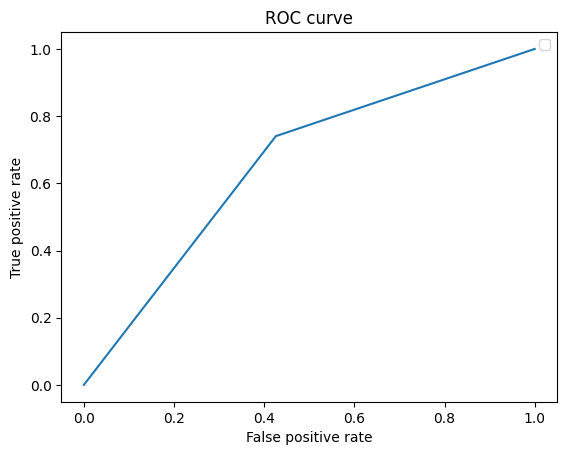

-----------------2nd--ABOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[193   0]
 [  0 501]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    193.0  501.0       1.0      694.0         694.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6972774327122153

 5 fold cv =  0.6936440412887082
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 28  19]
 [ 24 103]]
 ACCURACY SCORE:
0.7529
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.538462    0.844262  0.752874    0.691362      0.761661


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.7508496732026144

 5 fold cv =  0.7283865546218486

 RoC AUC Score::  0.7033841514491539


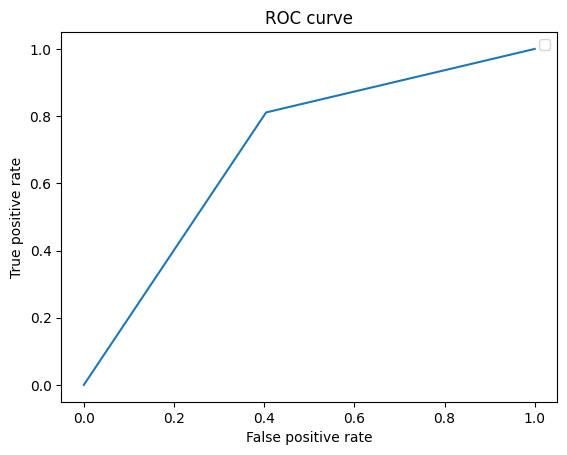

-----------------3rd--ECOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[206   0]
 [  0 514]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    206.0  514.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6638888888888889

 5 fold cv =  0.6640277777777779
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  20]
 [ 26 107]]
 ACCURACY SCORE:
0.7444
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.509434    0.842520  0.744444    0.675977      0.755547


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6888888888888887

 RoC AUC Score::  0.6894896816509358


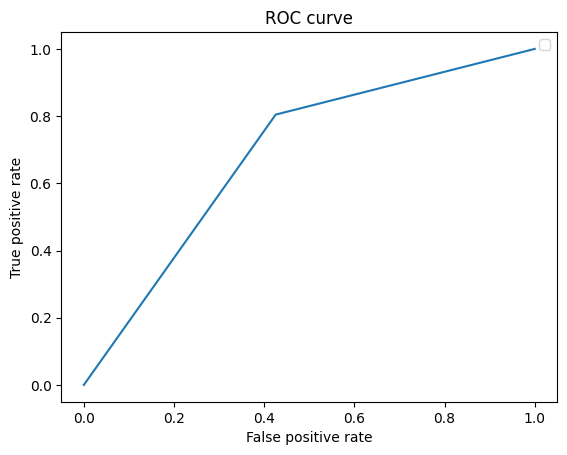

-----------------4th--COPOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[199   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    199.0  521.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6894444444444444

 5 fold cv =  0.6790277777777777
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[20 28]
 [33 99]]
 ACCURACY SCORE:
0.6611
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.377358    0.779528  0.661111    0.578443      0.672282
rec

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6738888888888889

 RoC AUC Score::  0.5833333333333333


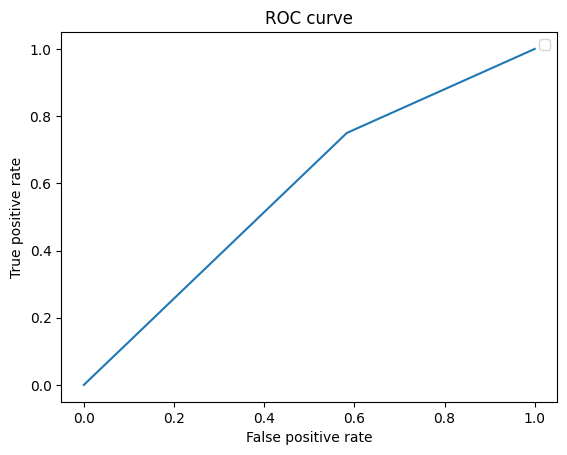

-----------------5th--CBLOF---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[215   0]
 [  0 505]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    215.0  505.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6848611111111111

 5 fold cv =  0.6845833333333333
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 25  22]
 [ 32 101]]
 ACCURACY SCORE:
0.7000
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.438596    0.821138       0.7    0.629867      0.721252

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.6911111111111111

 5 fold cv =  0.6977777777777778

 RoC AUC Score::  0.6456566949288114


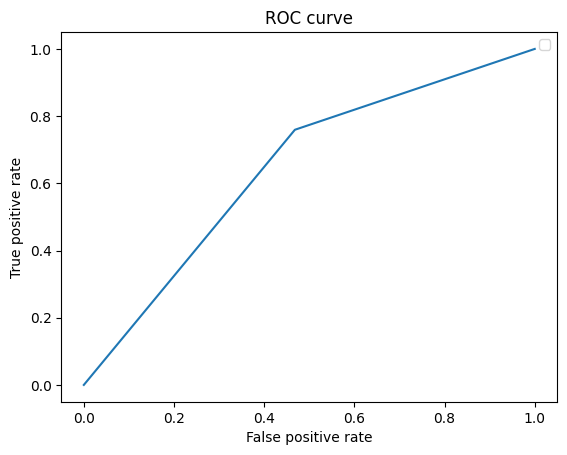

-----------------6th--FB---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[226   0]
 [  0 506]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    226.0  506.0       1.0      732.0         732.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6895075897815621

 5 fold cv =  0.6905628552790981
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 21  24]
 [ 37 101]]
 ACCURACY SCORE:
0.6667
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.362069    0.808000  0.666667    0.585034      0.698345
re

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.7190350877192984

 5 fold cv =  0.7032732732732733

 RoC AUC Score::  0.5992753623188406


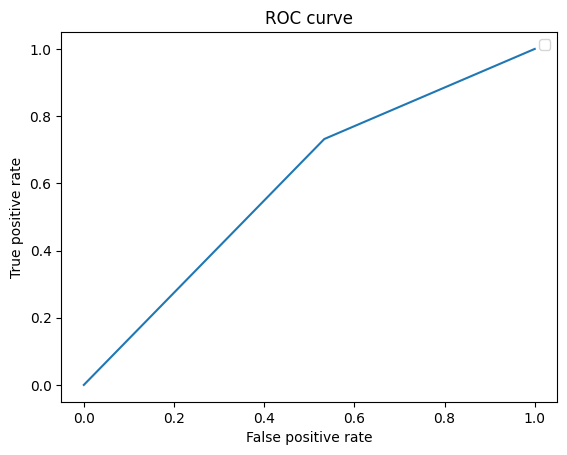

-----------------7th--IFOREST---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 515]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    205.0  515.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.696388888888889

 5 fold cv =  0.6947222222222222
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  21]
 [ 29 107]]
 ACCURACY SCORE:
0.7222
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.442308    0.835938  0.722222    0.639123      0.73971

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6588888888888889

 RoC AUC Score::  0.6547459893048128


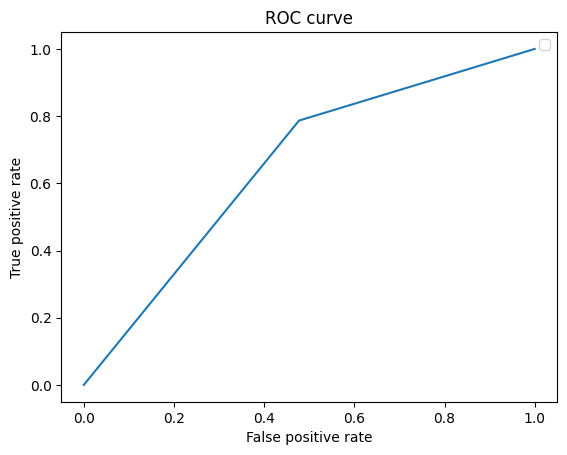

-----------------8th--LOF---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[222   0]
 [  0 504]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    222.0  504.0       1.0      726.0         726.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7013793759512937

 5 fold cv =  0.6887028814359941
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 22  26]
 [ 32 102]]
 ACCURACY SCORE:
0.6813
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.407407    0.796875  0.681319    0.602141      0.694158
r

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.662280701754386

 5 fold cv =  0.6791741741741739

 RoC AUC Score::  0.6097636815920398


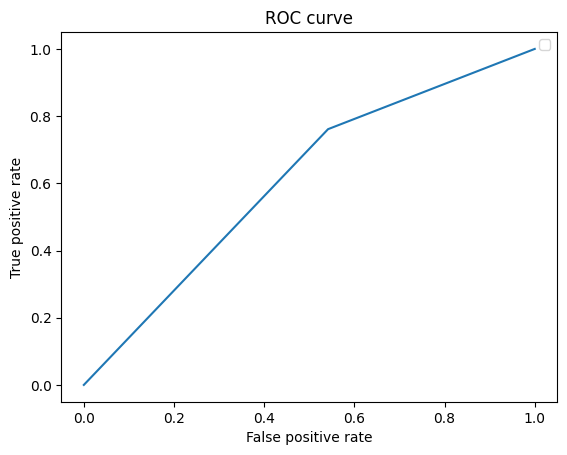

-----------------9th--ROD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[210   0]
 [  0 510]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    210.0  510.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6644444444444444

 5 fold cv =  0.6812499999999999
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 22  23]
 [ 23 112]]
 ACCURACY SCORE:
0.7444
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.488889    0.82963  0.744444    0.659259      0.744444
rec

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.7227777777777779

 5 fold cv =  0.7244444444444446

 RoC AUC Score::  0.6592592592592592


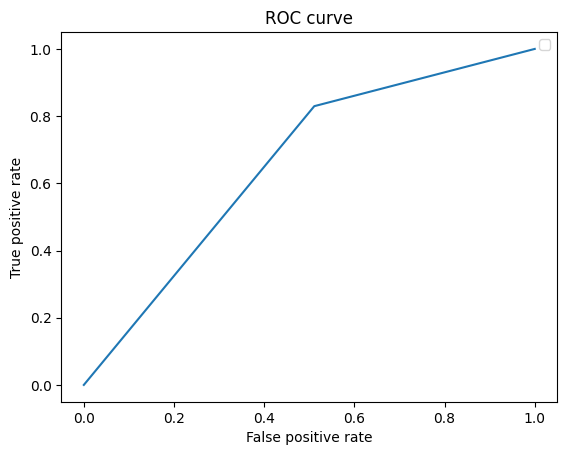

-----------------10th--INNE---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[207   0]
 [  0 513]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    207.0  513.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6965277777777777

 5 fold cv =  0.6998611111111113
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 17  32]
 [ 27 104]]
 ACCURACY SCORE:
0.6722
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.386364    0.764706  0.672222    0.575535      0.661713

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.6627777777777779

 5 fold cv =  0.6738888888888888

 RoC AUC Score::  0.5704159526405983


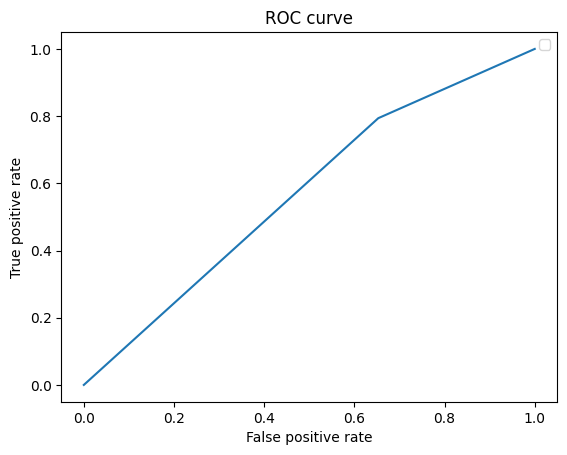

-----------------12th--LODA---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[220   0]
 [  0 500]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    220.0  500.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6838888888888889

 5 fold cv =  0.6844444444444445
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[27 23]
 [36 94]]
 ACCURACY SCORE:
0.6722
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.428571    0.803419  0.672222    0.615995      0.699295
rec

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6866666666666665

 RoC AUC Score::  0.6315384615384616


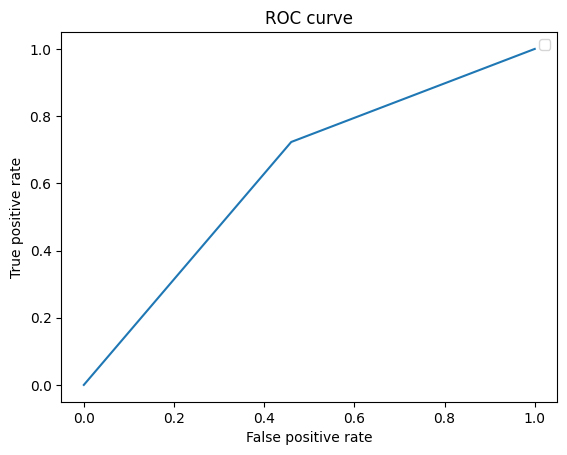

-----------------13th--SUOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[201   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    201.0  521.0       1.0      722.0         722.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6952682648401826

 5 fold cv =  0.7026197318007664
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[23 28]
 [33 97]]
 ACCURACY SCORE:
0.6630
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.410714    0.776000  0.662983    0.593357      0.673074
rec

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.6675146198830411

 5 fold cv =  0.6635285285285284

 RoC AUC Score::  0.5985671191553544


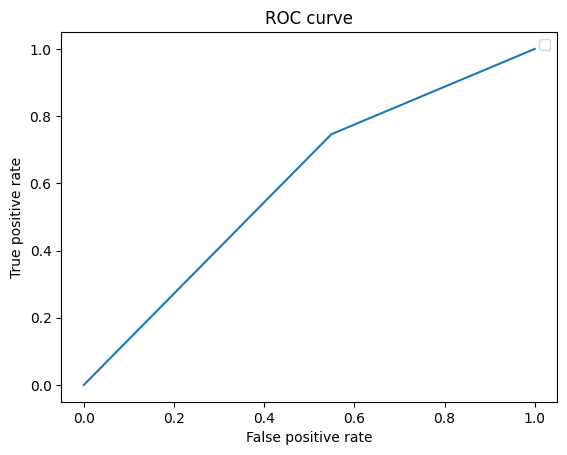

-----------------14th--DeepSVDD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[218   0]
 [  0 502]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    218.0  502.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6887499999999999

 5 fold cv =  0.675
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  27]
 [ 24 106]]
 ACCURACY SCORE:
0.7167
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.489362    0.796992  0.716667    0.643177      0.711539
recall  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.668888888888889

 5 fold cv =  0.6827777777777777

 RoC AUC Score::  0.6376923076923077


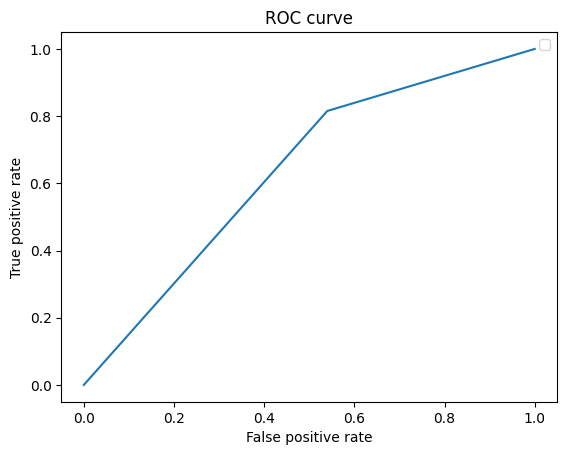

-----------------15th--ALAD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[225   0]
 [  0 495]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    225.0  495.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.6665277777777778

 5 fold cv =  0.6605555555555556
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[21 25]
 [39 95]]
 ACCURACY SCORE:
0.6444
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.350000    0.791667  0.644444    0.570833      0.678796
rec

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7327777777777779

 RoC AUC Score::  0.582738481505516


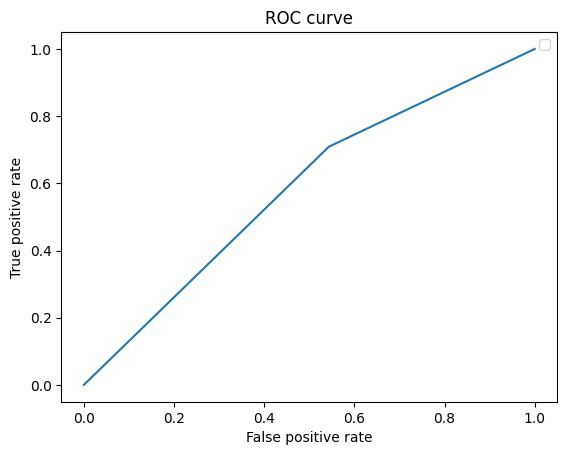

In [32]:
d_tr = DecisionTreeClassifier()
print("-----------------1st--KNN---------------")
d_tr.fit(X_train1, y_train1)
evaluate(d_tr, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
d_tr.fit(X_train2, y_train2)
evaluate(d_tr, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
d_tr.fit(X_train3, y_train3)
evaluate(d_tr, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
d_tr.fit(X_train4, y_train4)
evaluate(d_tr, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
d_tr.fit(X_train5, y_train5)
evaluate(d_tr, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
d_tr.fit(X_train6, y_train6)
evaluate(d_tr, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
d_tr.fit(X_train7, y_train7)
evaluate(d_tr, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
d_tr.fit(X_train8, y_train8)
evaluate(d_tr, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
d_tr.fit(X_train9, y_train9)
evaluate(d_tr, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
d_tr.fit(X_train10, y_train10)
evaluate(d_tr, X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#d_tr.fit(X_train11, y_train11)
#evaluate(d_tr, X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
d_tr.fit(X_train12, y_train12)
evaluate(d_tr, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
d_tr.fit(X_train13, y_train13)
evaluate(d_tr, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
d_tr.fit(X_train14, y_train14)
evaluate(d_tr, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
d_tr.fit(X_train15, y_train15)
evaluate(d_tr, X_train15, X_test15, y_train15, y_test15)

-----------------1st--KNN---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 532]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    205.0  532.0       1.0      737.0         737.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7788485746019994

 5 fold cv =  0.7766712630998345
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 25  29]
 [ 11 120]]
 ACCURACY SCORE:
0.7838
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.694444    0.805369  0.783784    0.749907  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7794594594594596

 RoC AUC Score::  0.8399773819621148


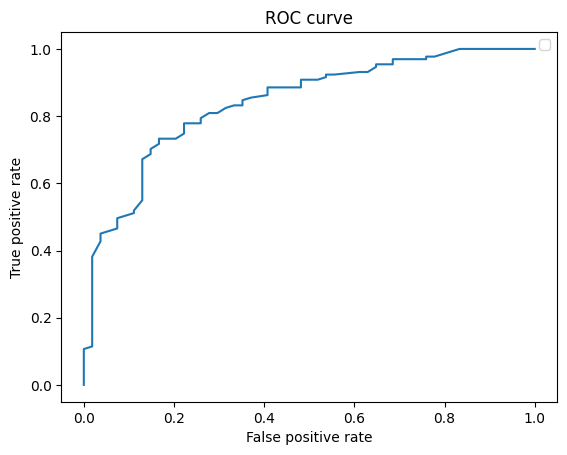

-----------------2nd--ABOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[193   0]
 [  0 501]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    193.0  501.0       1.0      694.0         694.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7938530020703933

 5 fold cv =  0.7943968303617975
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 24  23]
 [ 13 114]]
 ACCURACY SCORE:
0.7931
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.648649    0.832117  0.793103    0.740383 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7638487394957982

 RoC AUC Score::  0.8415144915396213


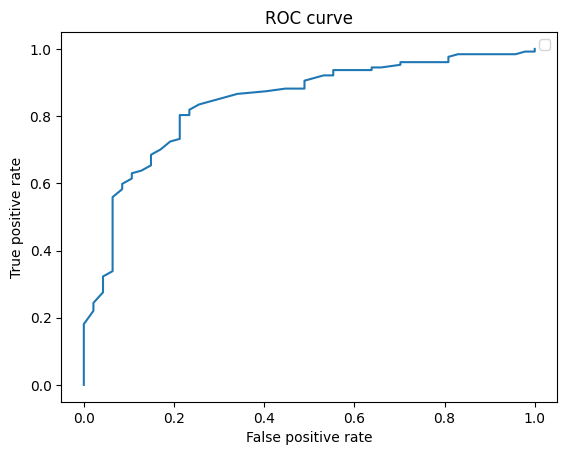

-----------------3rd--ECOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[206   0]
 [  0 514]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    206.0  514.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7473611111111111

 5 fold cv =  0.74625
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  24]
 [  8 125]]
 ACCURACY SCORE:
0.8222
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.741935    0.838926  0.822222    0.790431      0.8136

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7727777777777777

 RoC AUC Score::  0.808830587106063


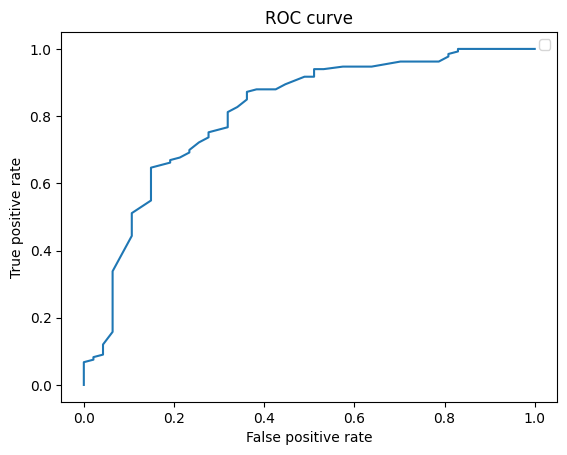

-----------------4th--COPOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[199   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    199.0  521.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7727777777777777

 5 fold cv =  0.7684722222222223
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 20  28]
 [ 14 118]]
 ACCURACY SCORE:
0.7667
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.588235    0.808219  0.766667    0.698227

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7494444444444445

 RoC AUC Score::  0.824258207070707


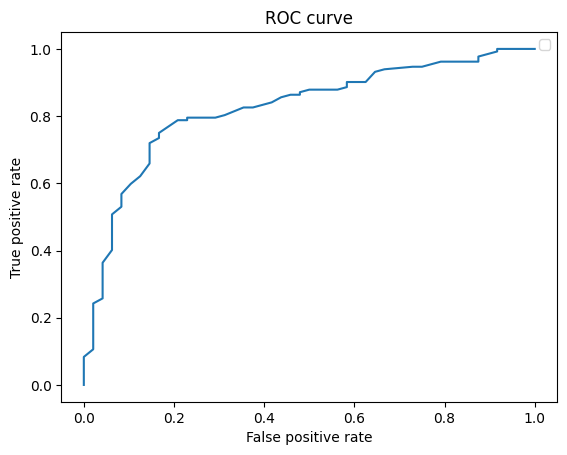

-----------------5th--CBLOF---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[215   0]
 [  0 505]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    215.0  505.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7722222222222223

 5 fold cv =  0.7713888888888887
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 20  27]
 [ 20 113]]
 ACCURACY SCORE:
0.7389
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.500000    0.807143  0.738889    0.653571

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7527777777777778

 RoC AUC Score::  0.8251479763237882


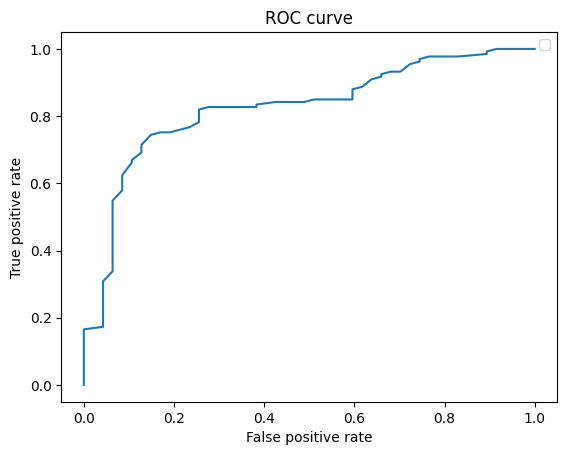

-----------------6th--FB---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[226   0]
 [  0 506]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    226.0  506.0       1.0      732.0         732.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7694372454646428

 5 fold cv =  0.764212095797223
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 18  27]
 [ 10 128]]
 ACCURACY SCORE:
0.7978
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.642857    0.825806  0.797814    0.734332    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.789024024024024

 RoC AUC Score::  0.8018518518518519


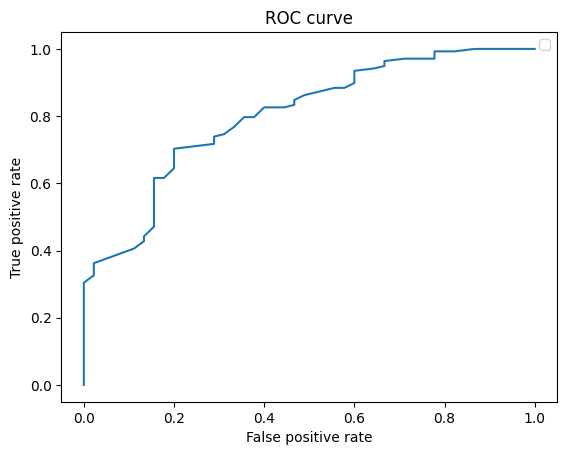

-----------------7th--IFOREST---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 515]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    205.0  515.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.775138888888889

 5 fold cv =  0.7718055555555555
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 21  23]
 [ 14 122]]
 ACCURACY SCORE:
0.7944
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.600000    0.841379  0.794444    0.72069

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.755

 RoC AUC Score::  0.7967914438502673


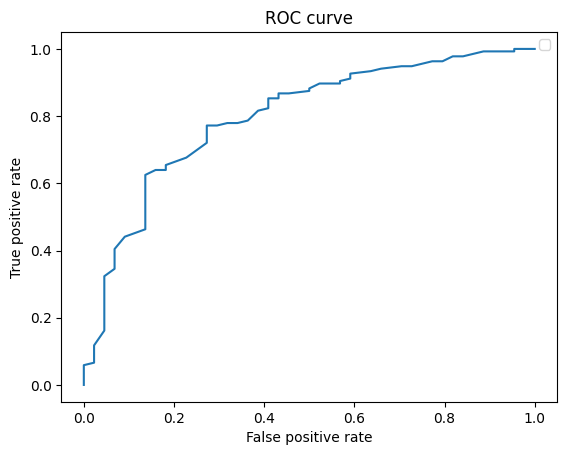

-----------------8th--LOF---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[222   0]
 [  0 504]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    222.0  504.0       1.0      726.0         726.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7795034246575341

 5 fold cv =  0.7764440245630609
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 22  26]
 [ 14 120]]
 ACCURACY SCORE:
0.7802
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.611111    0.821918   0.78022    0.716514  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7395495495495495

 RoC AUC Score::  0.7814054726368159


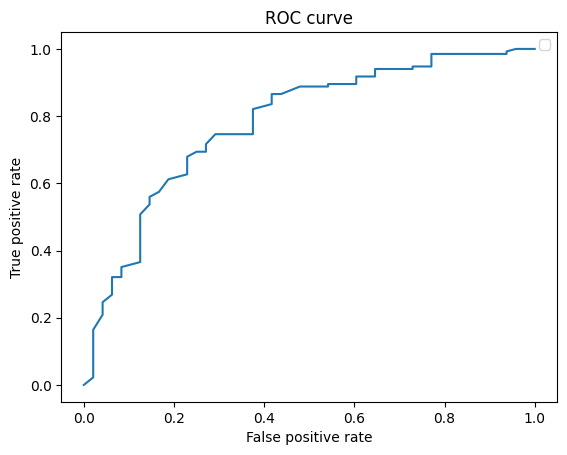

-----------------9th--ROD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[210   0]
 [  0 510]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    210.0  510.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7544444444444446

 5 fold cv =  0.7531944444444444
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 26  19]
 [  8 127]]
 ACCURACY SCORE:
0.8500
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.764706    0.869863      0.85    0.817284  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7605555555555555

 RoC AUC Score::  0.8725102880658437


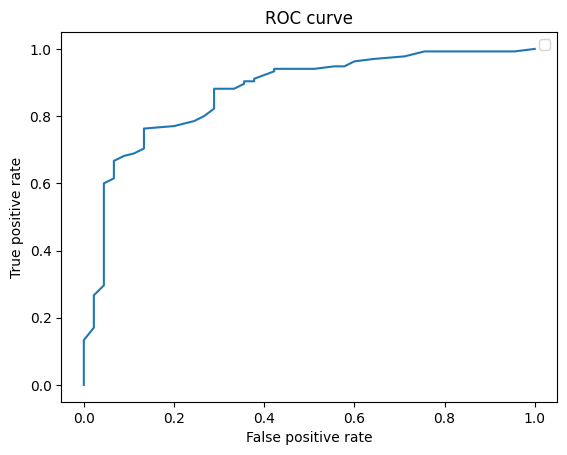

-----------------10th--INNE---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[207   0]
 [  0 513]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    207.0  513.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7770833333333335

 5 fold cv =  0.7730555555555556
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 26  23]
 [ 14 117]]
 ACCURACY SCORE:
0.7944
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.650000    0.835714  0.794444    0.742857

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7494444444444445

 RoC AUC Score::  0.846393519239757


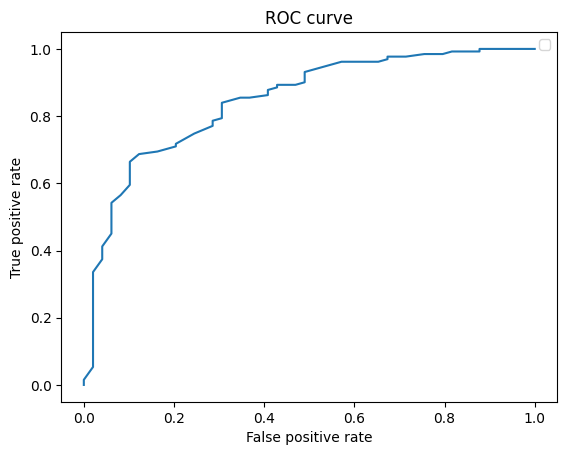

-----------------12th--LODA---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[220   0]
 [  0 500]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    220.0  500.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7659722222222223

 5 fold cv =  0.7572222222222222
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  27]
 [ 16 114]]
 ACCURACY SCORE:
0.7611
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.589744    0.808511  0.761111    0.699127

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7711111111111112

 RoC AUC Score::  0.7844615384615384


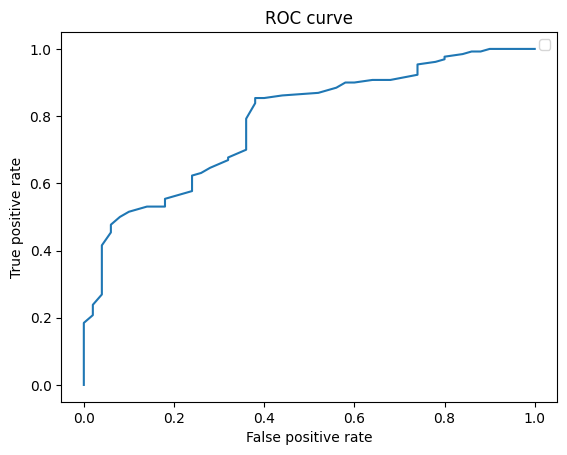

-----------------13th--SUOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[201   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    201.0  521.0       1.0      722.0         722.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7866590563165904

 5 fold cv =  0.7807250957854407
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 21  30]
 [ 11 119]]
 ACCURACY SCORE:
0.7735
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.656250    0.798658  0.773481    0.727454

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.745915915915916

 RoC AUC Score::  0.7542232277526395


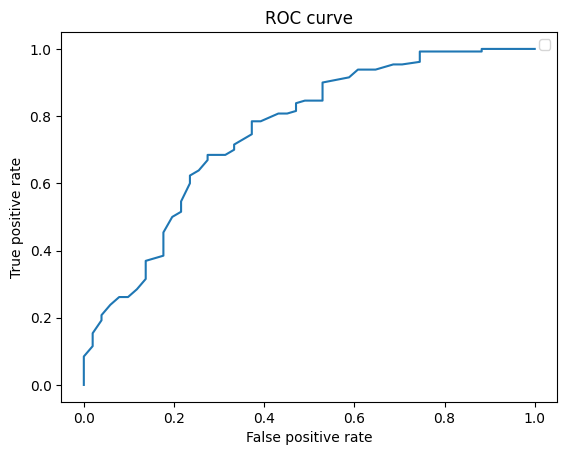

-----------------14th--DeepSVDD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[218   0]
 [  0 502]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    218.0  502.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7597222222222223

 5 fold cv =  0.7587499999999998
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  27]
 [ 16 114]]
 ACCURACY SCORE:
0.7611
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.589744    0.808511  0.761111    0.69

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.735

 RoC AUC Score::  0.7614615384615383


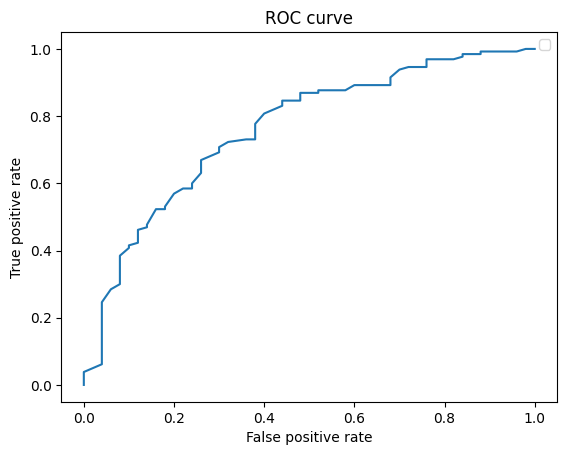

-----------------15th--ALAD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[225   0]
 [  0 495]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    225.0  495.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7380555555555556

 5 fold cv =  0.7391666666666667
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 22  24]
 [ 15 119]]
 ACCURACY SCORE:
0.7833
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.594595    0.832168  0.783333    0.713381

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7683333333333334

 RoC AUC Score::  0.8190298507462687


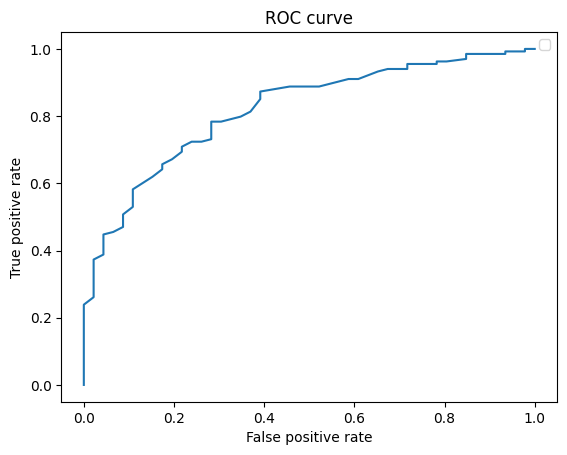

In [34]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators=100)
print("-----------------1st--KNN---------------")
rf_clf.fit(X_train1, y_train1)
evaluate(rf_clf, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
rf_clf.fit(X_train2, y_train2)
evaluate(rf_clf, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
rf_clf.fit(X_train3, y_train3)
evaluate(rf_clf, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
rf_clf.fit(X_train4, y_train4)
evaluate(rf_clf, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
rf_clf.fit(X_train5, y_train5)
evaluate(rf_clf, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
rf_clf.fit(X_train6, y_train6)
evaluate(rf_clf, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
rf_clf.fit(X_train7, y_train7)
evaluate(rf_clf, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
rf_clf.fit(X_train8, y_train8)
evaluate(rf_clf, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
rf_clf.fit(X_train9, y_train9)
evaluate(rf_clf, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
rf_clf.fit(X_train10, y_train10)
evaluate(rf_clf, X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#rf_clf.fit(X_train11, y_train11)
#evaluate(rf_clf, X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
rf_clf.fit(X_train12, y_train12)
evaluate(rf_clf, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
rf_clf.fit(X_train13, y_train13)
evaluate(rf_clf, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
rf_clf.fit(X_train14, y_train14)
evaluate(rf_clf, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
rf_clf.fit(X_train15, y_train15)
evaluate(rf_clf, X_train15, X_test15, y_train15, y_test15)

-----------------1st--KNN---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[125  80]
 [ 54 478]]
 ACCURACY SCORE:
0.8182
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.698324    0.856631  0.818182    0.777477      0.812597
recall       0.609756    0.898496  0.818182    0.754126      0.818182
f1-score     0.651042    0.877064  0.818182    0.764053      0.814195
support    205.000000  532.000000  0.818182  737.000000    737.000000

 MCC = 0.5310904804452792

 specificity =  0.6097560975609756

 Cohen Kappa =  0.5288667957904378

 F1 Score =  0.8770642201834863

 Precision =  0.8566308243727598

 Recall =  0.8984962406015038

 10 fold cv =  0.766355053683821

 5 fold cv =  0.7648584298584298
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  27]
 [ 13 118]]
 ACCURACY SCORE:
0.7838
 CLASSIFICATION REPORT:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7556756756756756

 RoC AUC Score::  0.8324851569126379


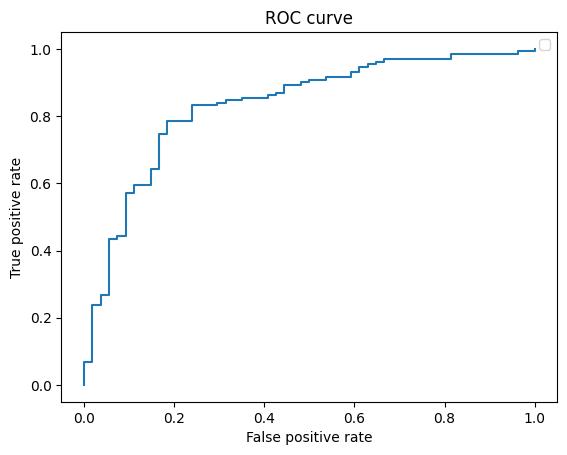

-----------------2nd--ABOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[117  76]
 [ 44 457]]
 ACCURACY SCORE:
0.8271
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.726708    0.857411  0.827089    0.792059      0.821063
recall       0.606218    0.912176  0.827089    0.759197      0.827089
f1-score     0.661017    0.883946  0.827089    0.772481      0.821950
support    193.000000  501.000000  0.827089  694.000000    694.000000

 MCC = 0.5502756882584333

 specificity =  0.6062176165803109

 Cohen Kappa =  0.5462322236146679

 F1 Score =  0.88394584139265

 Precision =  0.8574108818011257

 Recall =  0.9121756487025948

 10 fold cv =  0.7650517598343686

 5 fold cv =  0.7648462099885309
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 25  22]
 [ 11 116]]
 ACCURACY SCORE:
0.8103
 CLASSIFICATION REPORT:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7230252100840336

 RoC AUC Score::  0.8232534762941867


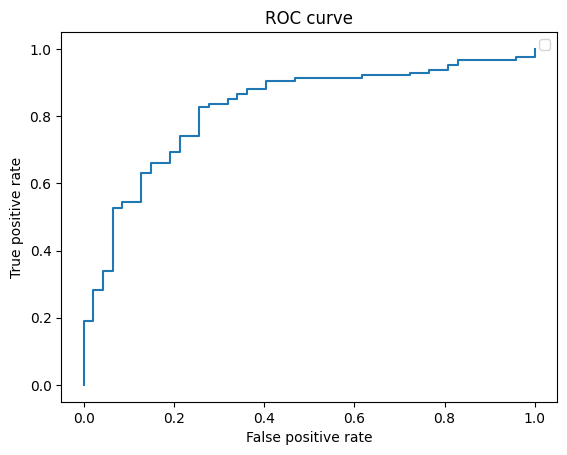

-----------------3rd--ECOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[119  87]
 [ 51 463]]
 ACCURACY SCORE:
0.8083
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.700000    0.841818  0.808333    0.770909      0.801242
recall       0.577670    0.900778  0.808333    0.739224      0.808333
f1-score     0.632979    0.870301  0.808333    0.751640      0.802400
support    206.000000  514.000000  0.808333  720.000000    720.000000

 MCC = 0.5091481971841832

 specificity =  0.5776699029126213

 Cohen Kappa =  0.5048833964520629

 F1 Score =  0.8703007518796994

 Precision =  0.8418181818181818

 Recall =  0.9007782101167315

 10 fold cv =  0.7318055555555556

 5 fold cv =  0.7283333333333334
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 24  23]
 [ 14 119]]
 ACCURACY SCORE:
0.7944
 CLASSIFICATION REPOR

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7572222222222221

 RoC AUC Score::  0.7645176771716525


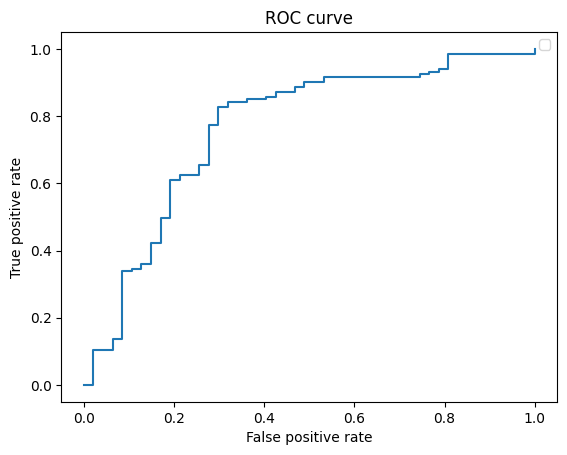

-----------------4th--COPOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[115  84]
 [ 46 475]]
 ACCURACY SCORE:
0.8194
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.714286    0.849732  0.819444    0.782009      0.812296
recall       0.577889    0.911708  0.819444    0.744799      0.819444
f1-score     0.638889    0.879630  0.819444    0.759259      0.813092
support    199.000000  521.000000  0.819444  720.000000    720.000000

 MCC = 0.525491780478265

 specificity =  0.5778894472361809

 Cohen Kappa =  0.52030011992497

 F1 Score =  0.8796296296296295

 Precision =  0.8497316636851521

 Recall =  0.9117082533589251

 10 fold cv =  0.7481944444444443

 5 fold cv =  0.7426388888888888
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  25]
 [ 18 114]]
 ACCURACY SCORE:
0.7611
 CLASSIFICATION REPORT:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6938888888888889

 RoC AUC Score::  0.7586016414141415


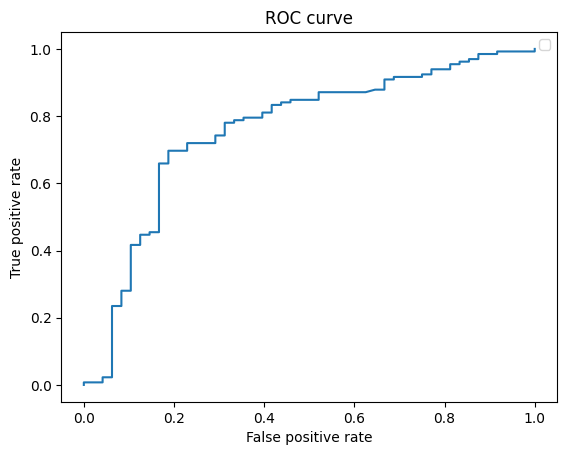

-----------------5th--CBLOF---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[135  80]
 [ 52 453]]
 ACCURACY SCORE:
0.8167
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.721925    0.849906  0.816667    0.785916      0.811690
recall       0.627907    0.897030  0.816667    0.762468      0.816667
f1-score     0.671642    0.872832  0.816667    0.772237      0.812755
support    215.000000  505.000000  0.816667  720.000000    720.000000

 MCC = 0.5478825030364072

 specificity =  0.627906976744186

 Cohen Kappa =  0.5453284217576424

 F1 Score =  0.8728323699421965

 Precision =  0.849906191369606

 Recall =  0.897029702970297

 10 fold cv =  0.7602777777777777

 5 fold cv =  0.7563888888888889
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 25  22]
 [ 21 112]]
 ACCURACY SCORE:
0.7611
 CLASSIFICATION REPORT:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7133333333333333

 RoC AUC Score::  0.8149096144616862


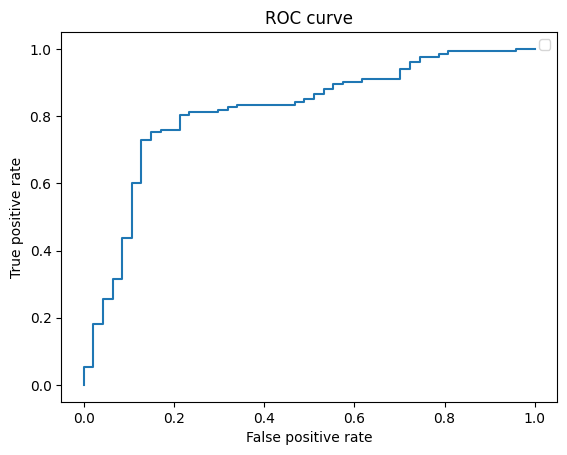

-----------------6th--FB---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[142  84]
 [ 57 449]]
 ACCURACY SCORE:
0.8074
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.713568    0.842402  0.807377    0.777985      0.802625
recall       0.628319    0.887352  0.807377    0.757835      0.807377
f1-score     0.668235    0.864293  0.807377    0.766264      0.803761
support    226.000000  506.000000  0.807377  732.000000    732.000000

 MCC = 0.5354408569505897

 specificity =  0.6283185840707964

 Cohen Kappa =  0.5332983649254811

 F1 Score =  0.8642925890279115

 Precision =  0.8424015009380863

 Recall =  0.8873517786561265

 10 fold cv =  0.7570733061828954

 5 fold cv =  0.7525971484484205
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 19  26]
 [ 16 122]]
 ACCURACY SCORE:
0.7705
 CLASSIFICATION REPORT:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7590390390390391

 RoC AUC Score::  0.7492753623188406


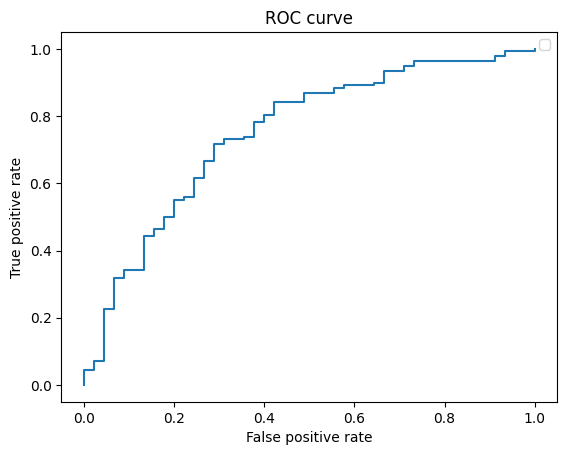

-----------------7th--IFOREST---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[128  77]
 [ 44 471]]
 ACCURACY SCORE:
0.8319
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.744186    0.859489  0.831944    0.801838      0.826660
recall       0.624390    0.914563  0.831944    0.769477      0.831944
f1-score     0.679045    0.886171  0.831944    0.782608      0.827198
support    205.000000  515.000000  0.831944  720.000000    720.000000

 MCC = 0.5703969815736323

 specificity =  0.624390243902439

 Cohen Kappa =  0.5663945849094167

 F1 Score =  0.8861712135465662

 Precision =  0.8594890510948905

 Recall =  0.9145631067961165

 10 fold cv =  0.7551388888888888

 5 fold cv =  0.7509722222222222
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  21]
 [ 21 115]]
 ACCURACY SCORE:
0.7667
 CLASSIFICATION REP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.708888888888889

 RoC AUC Score::  0.7648729946524064


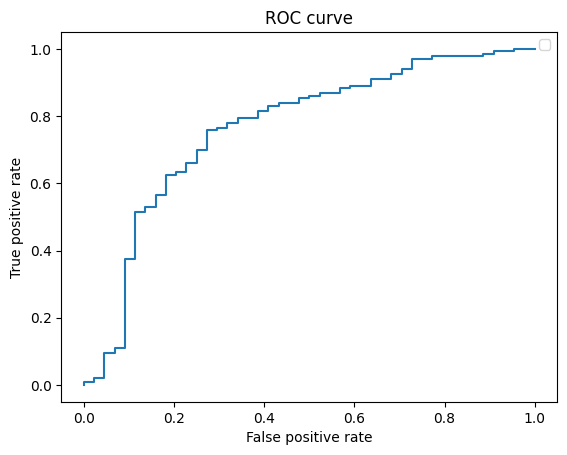

-----------------8th--LOF---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[146  76]
 [ 51 453]]
 ACCURACY SCORE:
0.8251
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.741117    0.856333  0.825069    0.798725      0.821101
recall       0.657658    0.898810  0.825069    0.778234      0.825069
f1-score     0.696897    0.877057  0.825069    0.786977      0.821967
support    222.000000  504.000000  0.825069  726.000000    726.000000

 MCC = 0.5765943235976775

 specificity =  0.6576576576576577

 Cohen Kappa =  0.5745688103873093

 F1 Score =  0.8770571151984511

 Precision =  0.8563327032136105

 Recall =  0.8988095238095238

 10 fold cv =  0.763540715372907

 5 fold cv =  0.760461029759093
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  21]
 [ 21 113]]
 ACCURACY SCORE:
0.7692
 CLASSIFICATION REPORT:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7131831831831832

 RoC AUC Score::  0.7719216417910448


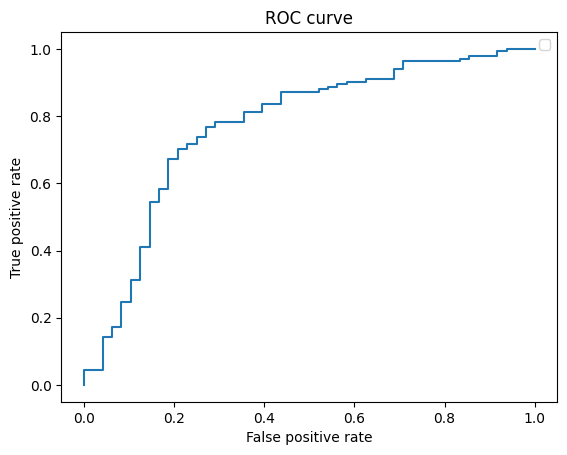

-----------------9th--ROD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[121  89]
 [ 46 464]]
 ACCURACY SCORE:
0.8125
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.724551    0.839060    0.8125    0.781805      0.805661
recall       0.576190    0.909804    0.8125    0.742997      0.812500
f1-score     0.641910    0.873001    0.8125    0.757455      0.805599
support    210.000000  510.000000    0.8125  720.000000    720.000000

 MCC = 0.5233656282686745

 specificity =  0.5761904761904761

 Cohen Kappa =  0.5171385991058122

 F1 Score =  0.8730009407337723

 Precision =  0.8390596745027125

 Recall =  0.9098039215686274

 10 fold cv =  0.7440277777777777

 5 fold cv =  0.7447222222222222
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  22]
 [ 21 114]]
 ACCURACY SCORE:
0.7611
 CLASSIFICATION REPORT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.735

 RoC AUC Score::  0.7981893004115226


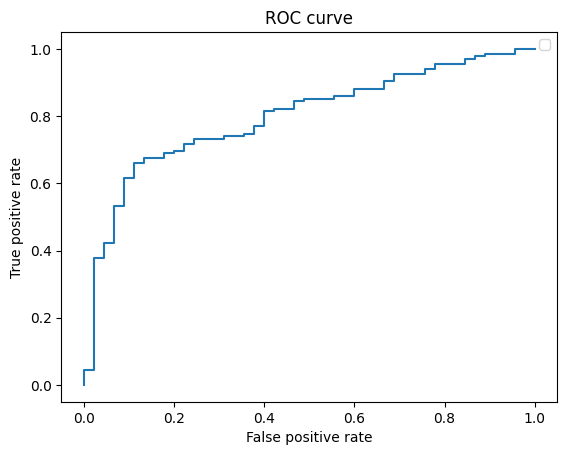

-----------------10th--INNE---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[132  75]
 [ 44 469]]
 ACCURACY SCORE:
0.8347
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.750000    0.862132  0.834722    0.806066      0.829894
recall       0.637681    0.914230  0.834722    0.775956      0.834722
f1-score     0.689295    0.887417  0.834722    0.788356      0.830457
support    207.000000  513.000000  0.834722  720.000000    720.000000

 MCC = 0.5812423664555426

 specificity =  0.6376811594202898

 Cohen Kappa =  0.5777146912704045

 F1 Score =  0.8874172185430464

 Precision =  0.8621323529411765

 Recall =  0.9142300194931774

 10 fold cv =  0.7552777777777778

 5 fold cv =  0.7540277777777779
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 24  25]
 [ 21 110]]
 ACCURACY SCORE:
0.7444
 CLASSIFICATION REPO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7227777777777779

 RoC AUC Score::  0.8205327932699797


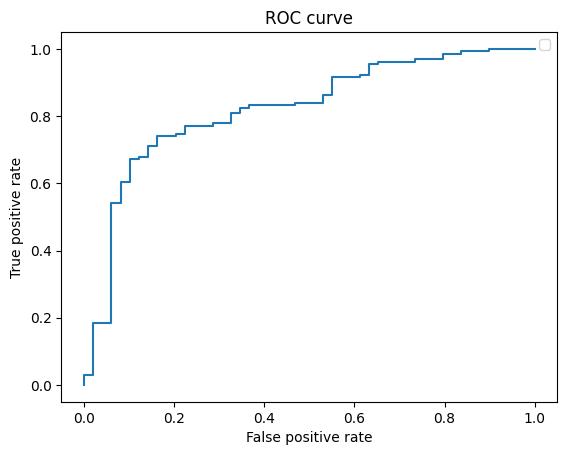

-----------------12th--LODA---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[138  82]
 [ 56 444]]
 ACCURACY SCORE:
0.8083
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.711340    0.844106  0.808333    0.777723      0.803539
recall       0.627273    0.888000  0.808333    0.757636      0.808333
f1-score     0.666667    0.865497  0.808333    0.766082      0.804743
support    220.000000  500.000000  0.808333  720.000000    720.000000

 MCC = 0.5349827291963521

 specificity =  0.6272727272727273

 Cohen Kappa =  0.532907107935314

 F1 Score =  0.8654970760233919

 Precision =  0.844106463878327

 Recall =  0.888

 10 fold cv =  0.7404166666666667

 5 fold cv =  0.74375
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 24  26]
 [ 20 110]]
 ACCURACY SCORE:
0.7444
 CLASSIFICATION REPORT:
                   0  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7222222222222223

 RoC AUC Score::  0.7547692307692306


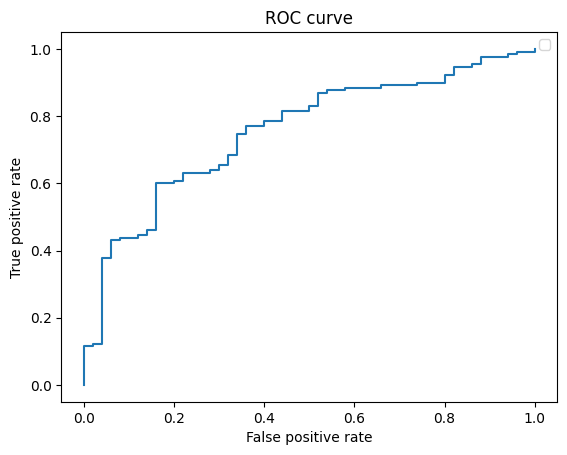

-----------------13th--SUOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[126  75]
 [ 49 472]]
 ACCURACY SCORE:
0.8283
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.720000    0.862888  0.828255    0.791444      0.823109
recall       0.626866    0.905950  0.828255    0.766408      0.828255
f1-score     0.670213    0.883895  0.828255    0.777054      0.824407
support    201.000000  521.000000  0.828255  722.000000    722.000000

 MCC = 0.557290027100356

 specificity =  0.6268656716417911

 Cohen Kappa =  0.5548572508228836

 F1 Score =  0.8838951310861424

 Precision =  0.8628884826325411

 Recall =  0.9059500959692899

 10 fold cv =  0.777945205479452

 5 fold cv =  0.7769980842911878
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 21  30]
 [ 18 112]]
 ACCURACY SCORE:
0.7348
 CLASSIFICATION REPORT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6833033033033034

 RoC AUC Score::  0.7006033182503771


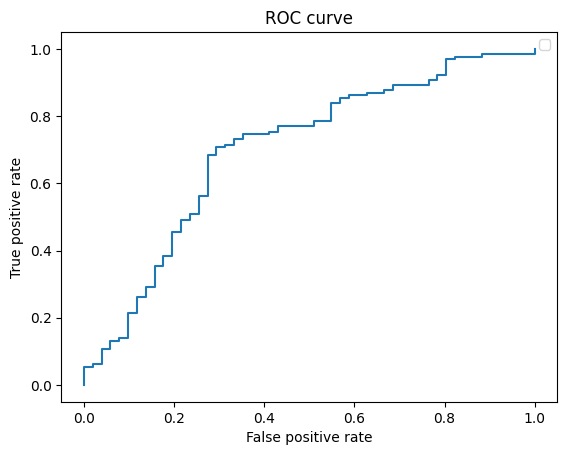

-----------------14th--DeepSVDD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[131  87]
 [ 53 449]]
 ACCURACY SCORE:
0.8056
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.711957    0.837687  0.805556    0.774822      0.799618
recall       0.600917    0.894422  0.805556    0.747670      0.805556
f1-score     0.651741    0.865125  0.805556    0.758433      0.800517
support    218.000000  502.000000  0.805556  720.000000    720.000000

 MCC = 0.5217854595729593

 specificity =  0.6009174311926605

 Cohen Kappa =  0.5182012847965739

 F1 Score =  0.8651252408477842

 Precision =  0.8376865671641791

 Recall =  0.8944223107569721

 10 fold cv =  0.7363888888888889

 5 fold cv =  0.7325000000000002
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  23]
 [ 19 111]]
 ACCURACY SCORE:
0.7667
 CLASSIFICATION 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7161111111111111

 RoC AUC Score::  0.7611538461538462


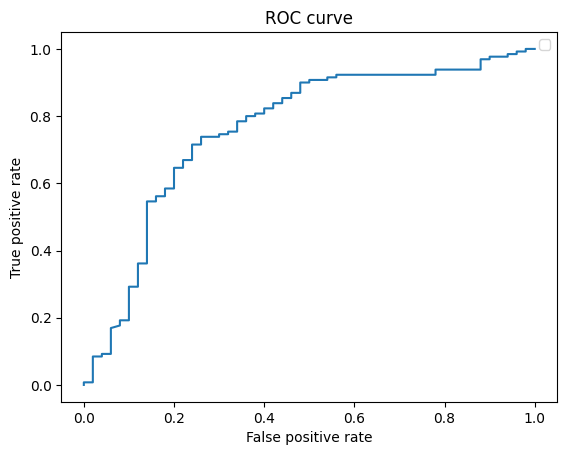

-----------------15th--ALAD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[135  90]
 [ 42 453]]
 ACCURACY SCORE:
0.8167
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.762712    0.834254  0.816667    0.798483      0.811897
recall       0.600000    0.915152  0.816667    0.757576      0.816667
f1-score     0.671642    0.872832  0.816667    0.772237      0.809960
support    225.000000  495.000000  0.816667  720.000000    720.000000

 MCC = 0.5545520205918932

 specificity =  0.6

 Cohen Kappa =  0.546975546975547

 F1 Score =  0.8728323699421965

 Precision =  0.8342541436464088

 Recall =  0.9151515151515152

 10 fold cv =  0.735

 5 fold cv =  0.7333333333333334
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 24  22]
 [ 18 116]]
 ACCURACY SCORE:
0.7778
 CLASSIFICATION REPORT:
                   0     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7644444444444445

 RoC AUC Score::  0.7926670992861778


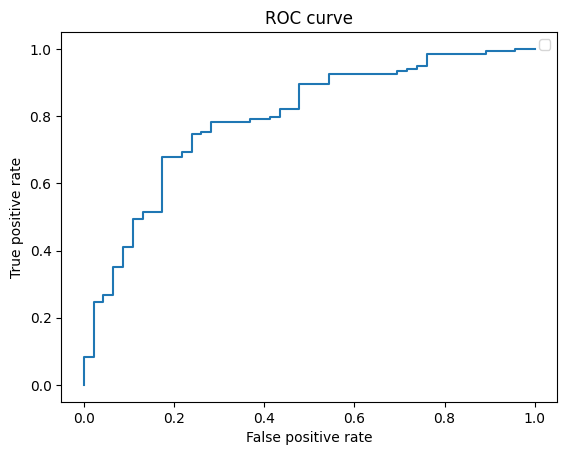

In [35]:
ada_boost_clf = AdaBoostClassifier(n_estimators=50)
print("-----------------1st--KNN---------------")
ada_boost_clf.fit(X_train1, y_train1)
evaluate(ada_boost_clf, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
ada_boost_clf.fit(X_train2, y_train2)
evaluate(ada_boost_clf, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
ada_boost_clf.fit(X_train3, y_train3)
evaluate(ada_boost_clf, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
ada_boost_clf.fit(X_train4, y_train4)
evaluate(ada_boost_clf, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
ada_boost_clf.fit(X_train5, y_train5)
evaluate(ada_boost_clf, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
ada_boost_clf.fit(X_train6, y_train6)
evaluate(ada_boost_clf, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
ada_boost_clf.fit(X_train7, y_train7)
evaluate(ada_boost_clf, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
ada_boost_clf.fit(X_train8, y_train8)
evaluate(ada_boost_clf, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
ada_boost_clf.fit(X_train9, y_train9)
evaluate(ada_boost_clf, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
ada_boost_clf.fit(X_train10, y_train10)
evaluate(ada_boost_clf, X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#ada_boost_clf.fit(X_train11, y_train11)
#evaluate(ada_boost_clf, X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
ada_boost_clf.fit(X_train12, y_train12)
evaluate(ada_boost_clf, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
ada_boost_clf.fit(X_train13, y_train13)
evaluate(ada_boost_clf, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
ada_boost_clf.fit(X_train14, y_train14)
evaluate(ada_boost_clf, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
ada_boost_clf.fit(X_train15, y_train15)
evaluate(ada_boost_clf, X_train15, X_test15, y_train15, y_test15)

-----------------1st--KNN---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 532]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7762162162162163

 RoC AUC Score::  0.7794741306191689


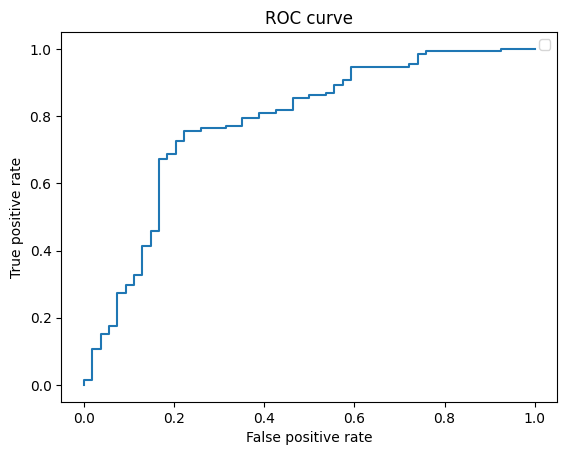

-----------------2nd--ABOD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[193   0]
 [  0 501]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7586890756302522

 RoC AUC Score::  0.8346456692913384


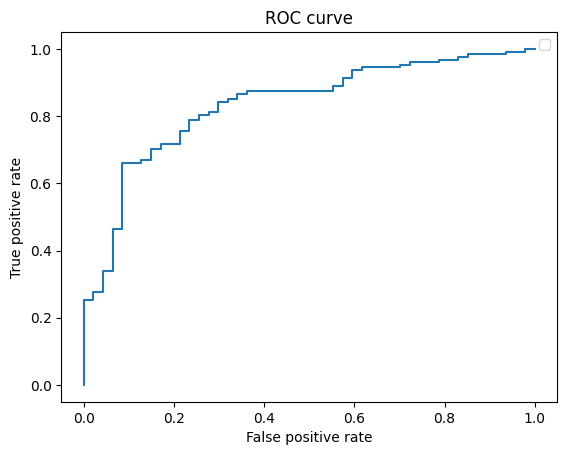

-----------------3rd--ECOD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[206   0]
 [  0 514]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7722222222222223

 RoC AUC Score::  0.810270356742921


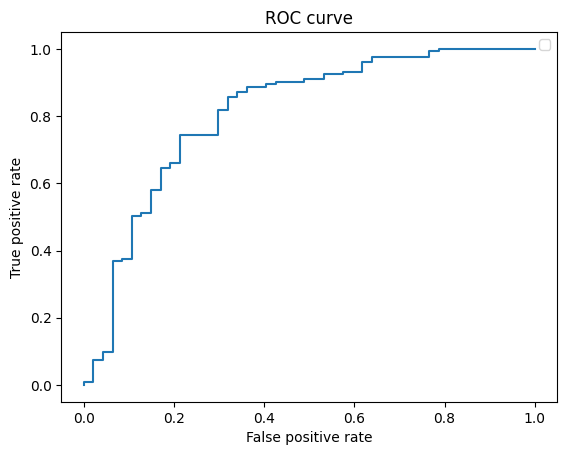

-----------------4th--COPOD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[199   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7216666666666666

 RoC AUC Score::  0.7785669191919192


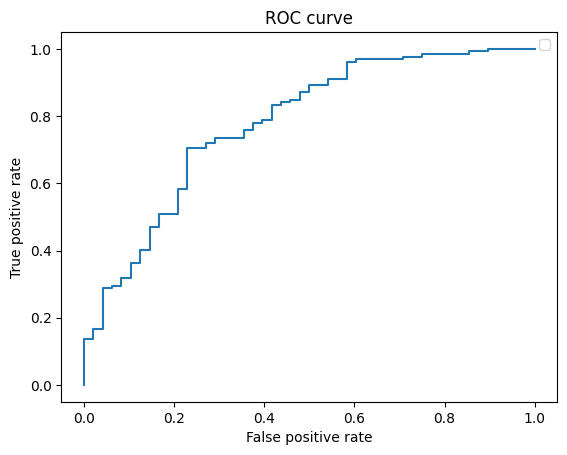

-----------------5th--CBLOF---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[215   0]
 [  0 505]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7505555555555555

 RoC AUC Score::  0.7963525835866262


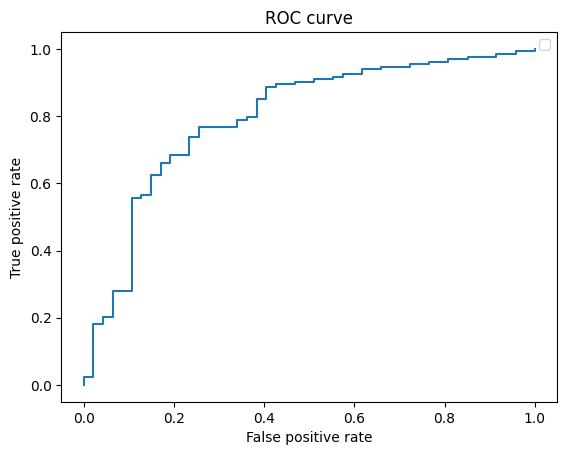

-----------------6th--FB---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[226   0]
 [  0 506]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7732432432432432

 RoC AUC Score::  0.788083735909823


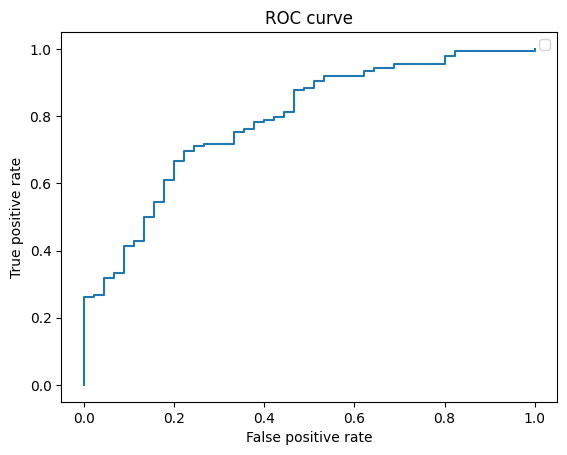

-----------------7th--IFOREST---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 515]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7344444444444446

 RoC AUC Score::  0.7936163101604278


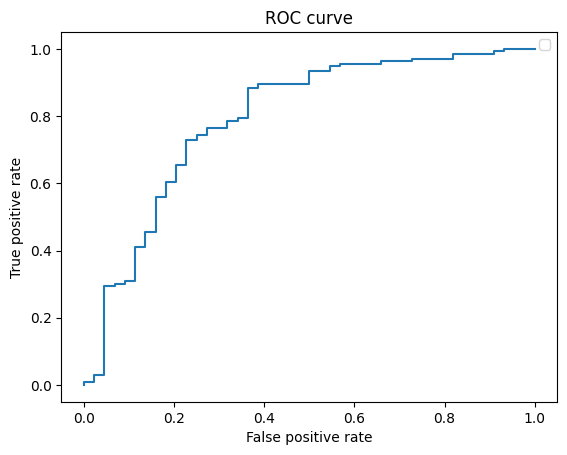

-----------------8th--LOF---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[222   0]
 [  0 504]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7326126126126127

 RoC AUC Score::  0.7703669154228856


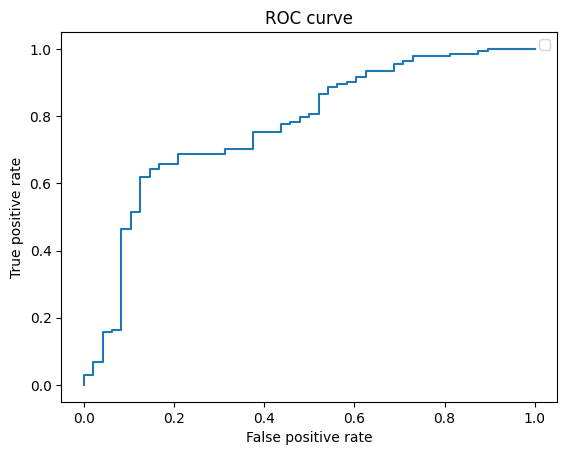

-----------------9th--ROD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[210   0]
 [  0 510]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.778888888888889

 RoC AUC Score::  0.8294650205761317


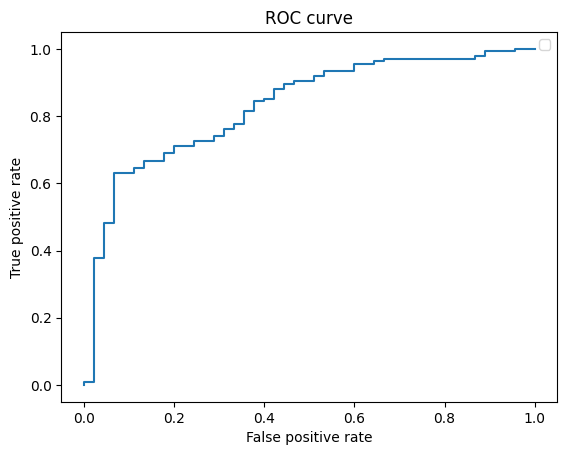

-----------------10th--INNE---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[207   0]
 [  0 513]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.743888888888889

 RoC AUC Score::  0.8334631562548683


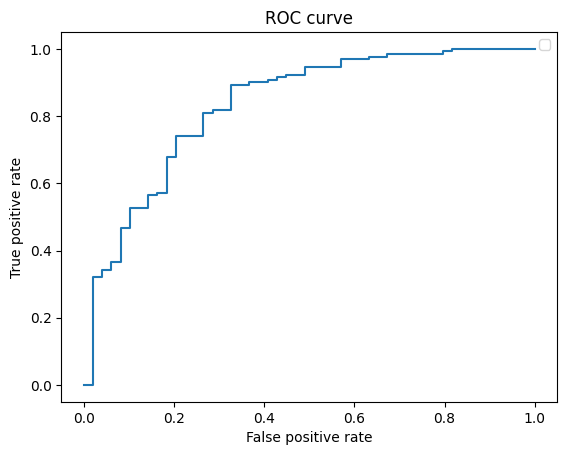

-----------------12th--LODA---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[220   0]
 [  0 500]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7550000000000001

 RoC AUC Score::  0.7466153846153847


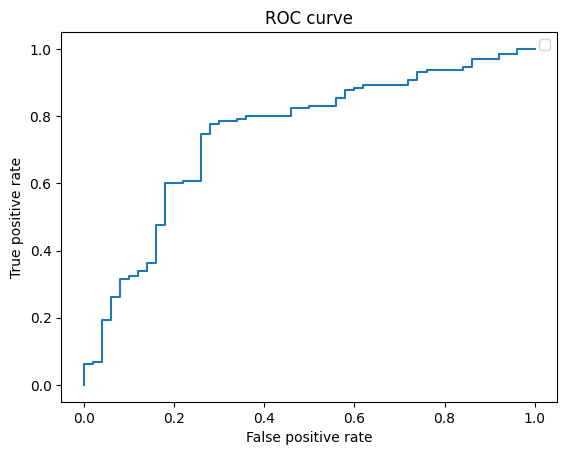

-----------------13th--SUOD--------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[201   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7149849849849851

 RoC AUC Score::  0.7549019607843138


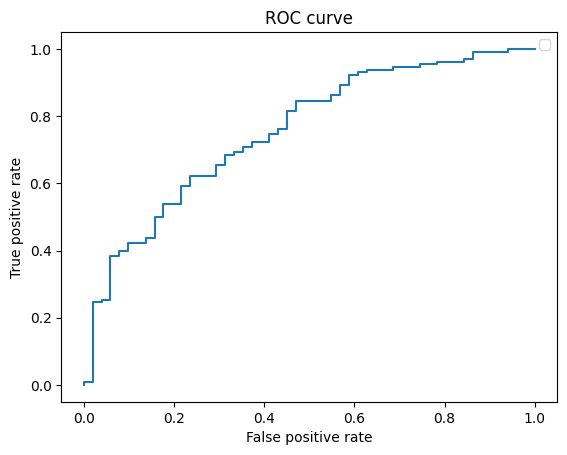

-----------------14th--DeepSVDD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[218   0]
 [  0 502]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7222222222222221

 RoC AUC Score::  0.7710769230769231


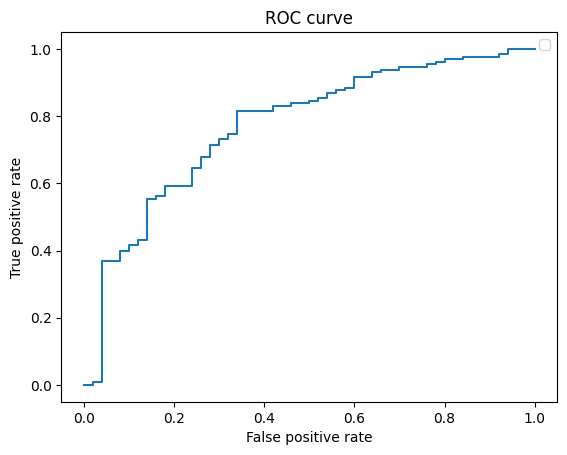

-----------------15th--ALAD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[225   0]
 [  0 495]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.77

 RoC AUC Score::  0.7618429591174563


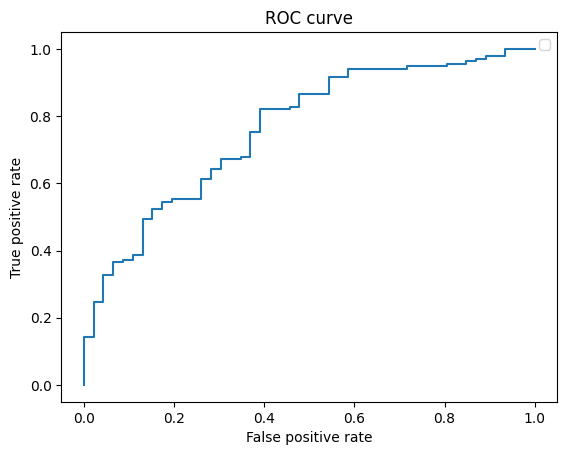

In [36]:
grad_boost_clf = XGBClassifier(n_estimators=100)
print("-----------------1st--KNN---------------")
grad_boost_clf.fit(X_train1, y_train1)
evaluate(grad_boost_clf, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
grad_boost_clf.fit(X_train2, y_train2)
evaluate(grad_boost_clf, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
grad_boost_clf.fit(X_train3, y_train3)
evaluate(grad_boost_clf, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
grad_boost_clf.fit(X_train4, y_train4)
evaluate(grad_boost_clf, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
grad_boost_clf.fit(X_train5, y_train5)
evaluate(grad_boost_clf, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
grad_boost_clf.fit(X_train6, y_train6)
evaluate(grad_boost_clf, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
grad_boost_clf.fit(X_train7, y_train7)
evaluate(grad_boost_clf, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
grad_boost_clf.fit(X_train8, y_train8)
evaluate(grad_boost_clf, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
grad_boost_clf.fit(X_train9, y_train9)
evaluate(grad_boost_clf, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
grad_boost_clf.fit(X_train10, y_train10)
evaluate(grad_boost_clf, X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#grad_boost_clf.fit(X_train11, y_train11)
#evaluate(grad_boost_clf, X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
grad_boost_clf.fit(X_train12, y_train12)
evaluate(grad_boost_clf, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD--------------")
grad_boost_clf.fit(X_train13, y_train13)
evaluate(grad_boost_clf, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
grad_boost_clf.fit(X_train14, y_train14)
evaluate(grad_boost_clf, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
grad_boost_clf.fit(X_train15, y_train15)
evaluate(grad_boost_clf, X_train15, X_test15, y_train15, y_test15)

-----------------1st--KNN---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 532]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    205.0  532.0       1.0      737.0         737.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.764457608293225

 5 fold cv =  0.7692121713550284
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  27]
 [ 15 116]]
 ACCURACY SCORE:
0.7730
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.642857    0.811189  0.772973    0.727023      0.762054
recall    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7805405405405407

 RoC AUC Score::  0.8053435114503816


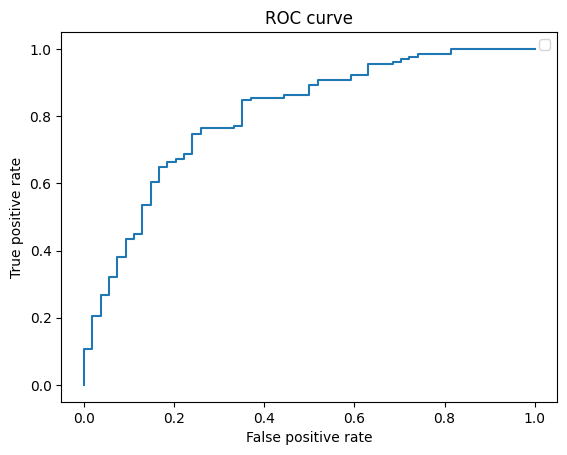

-----------------2nd--ABOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[193   0]
 [  0 501]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    193.0  501.0       1.0      694.0         694.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7918343685300206

 5 fold cv =  0.7876092169742465
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  20]
 [ 16 111]]
 ACCURACY SCORE:
0.7931
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.627907    0.847328  0.793103    0.737618      0.788059
recall  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7695798319327731

 RoC AUC Score::  0.8500586362874855


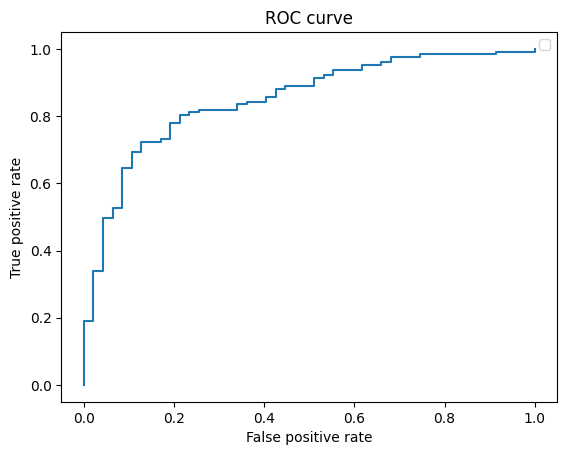

-----------------3rd--ECOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[206   0]
 [  0 514]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    206.0  514.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7390277777777777

 5 fold cv =  0.7352777777777777
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  24]
 [  8 125]]
 ACCURACY SCORE:
0.8222
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.741935    0.838926  0.822222    0.790431      0.813601
recall  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.778888888888889

 RoC AUC Score::  0.8013117901135818


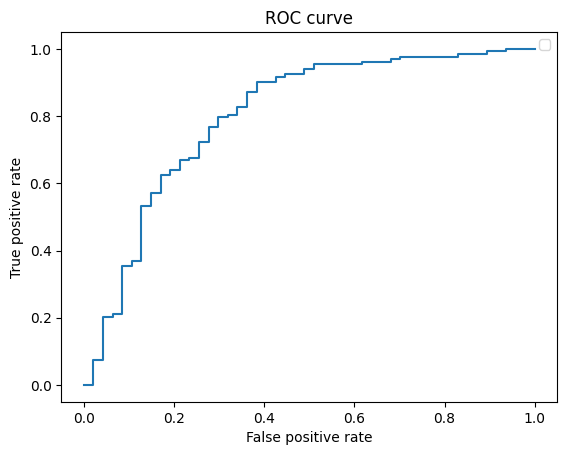

-----------------4th--COPOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[199   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    199.0  521.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7652777777777777

 5 fold cv =  0.7627777777777776
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  21]
 [ 18 114]]
 ACCURACY SCORE:
0.7833
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.600000    0.844444  0.783333    0.722222      0.779259
recall 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7388888888888888

 RoC AUC Score::  0.7760416666666666


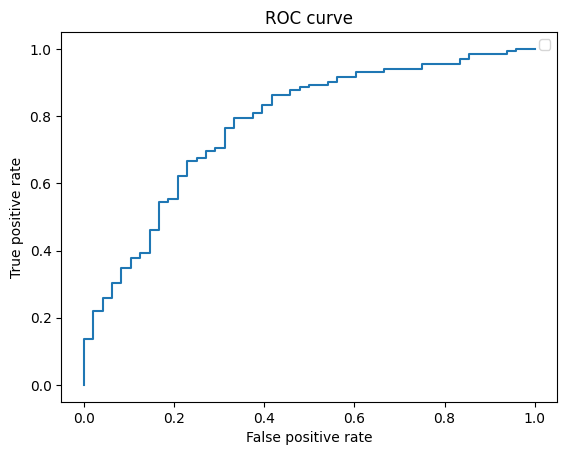

-----------------5th--CBLOF---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[215   0]
 [  0 505]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    215.0  505.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7631944444444446

 5 fold cv =  0.7616666666666667
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 29  18]
 [ 20 113]]
 ACCURACY SCORE:
0.7889
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.591837    0.862595  0.788889    0.727216      0.791897
recall 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7505555555555555

 RoC AUC Score::  0.798592225243961


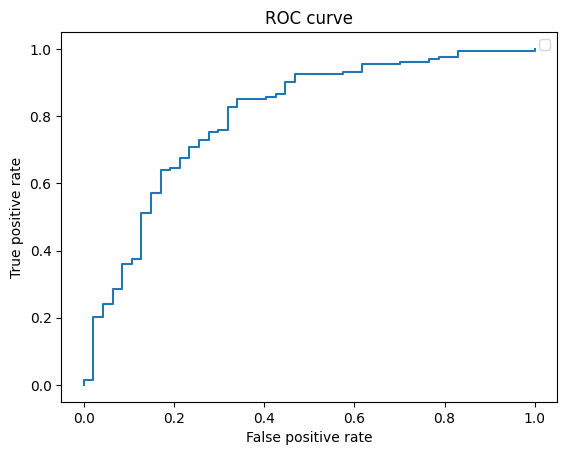

-----------------6th--FB---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[226   0]
 [  0 506]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    226.0  506.0       1.0      732.0         732.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7563106256941875

 5 fold cv =  0.757646072127481
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 18  27]
 [ 17 121]]
 ACCURACY SCORE:
0.7596
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.514286    0.817568  0.759563    0.665927      0.742990
recall     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7689339339339339

 RoC AUC Score::  0.7607085346215782


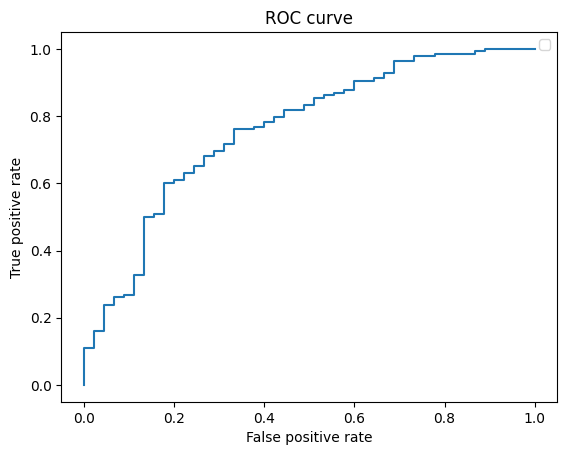

-----------------7th--IFOREST---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[205   0]
 [  0 515]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    205.0  515.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7641666666666667

 5 fold cv =  0.762361111111111
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  17]
 [ 20 116]]
 ACCURACY SCORE:
0.7944
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.574468    0.872180  0.794444    0.723324      0.799406
recall

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7416666666666666

 RoC AUC Score::  0.7645387700534759


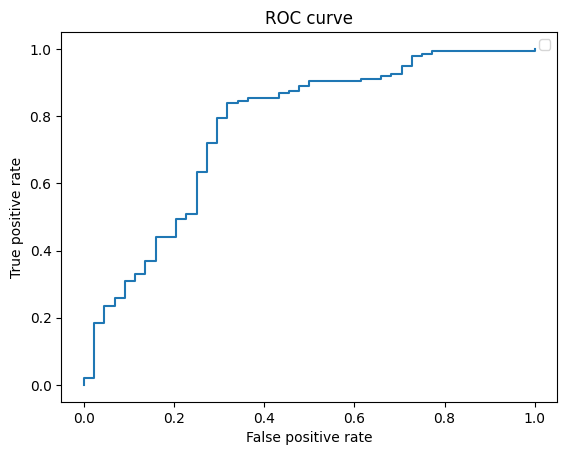

-----------------8th--LOF---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[222   0]
 [  0 504]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    222.0  504.0       1.0      726.0         726.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7665296803652969

 5 fold cv =  0.7623967879074164
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 26  22]
 [ 21 113]]
 ACCURACY SCORE:
0.7637
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.553191    0.837037  0.763736    0.695114      0.762177
recall   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.747897897897898

 RoC AUC Score::  0.7717661691542288


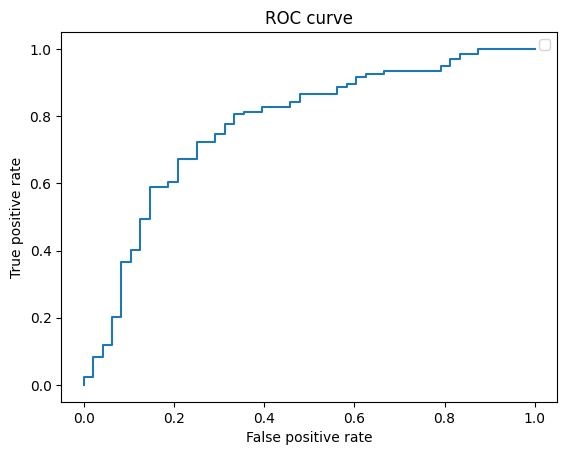

-----------------9th--ROD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[210   0]
 [  0 510]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    210.0  510.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7476388888888889

 5 fold cv =  0.7456944444444445
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  18]
 [ 15 120]]
 ACCURACY SCORE:
0.8167
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.642857    0.869565  0.816667    0.756211      0.812888
recall   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7738888888888888

 RoC AUC Score::  0.8530041152263375


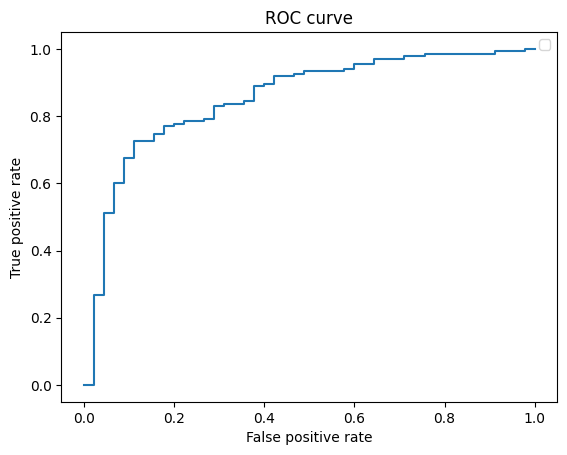

-----------------10th--INNE---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[207   0]
 [  0 513]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    207.0  513.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7676388888888889

 5 fold cv =  0.7713888888888889
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 29  20]
 [ 15 116]]
 ACCURACY SCORE:
0.8056
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.659091    0.852941  0.805556    0.756016      0.800171
recall 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7522222222222221

 RoC AUC Score::  0.8356441813366567


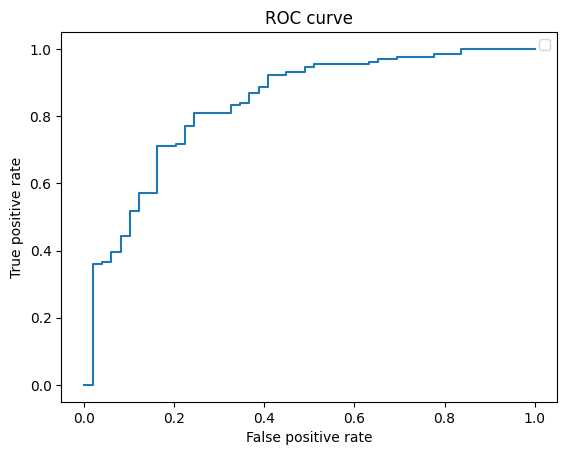

-----------------12th--LODA---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[220   0]
 [  0 500]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    220.0  500.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7568055555555556

 5 fold cv =  0.7520833333333334
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 26  24]
 [ 19 111]]
 ACCURACY SCORE:
0.7611
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.577778    0.822222  0.761111    0.700000      0.754321
recall 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7466666666666667

 RoC AUC Score::  0.7372307692307692


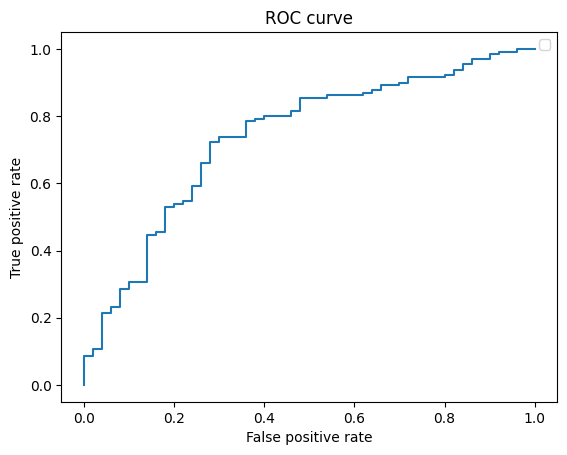

-----------------13th--SUOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[201   0]
 [  0 521]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    201.0  521.0       1.0      722.0         722.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7841590563165908

 5 fold cv =  0.7812892720306513
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 23  28]
 [ 15 115]]
 ACCURACY SCORE:
0.7624
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.605263    0.804196  0.762431    0.704729      0.748143
recall 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.6956456456456458

 RoC AUC Score::  0.7360482654600302


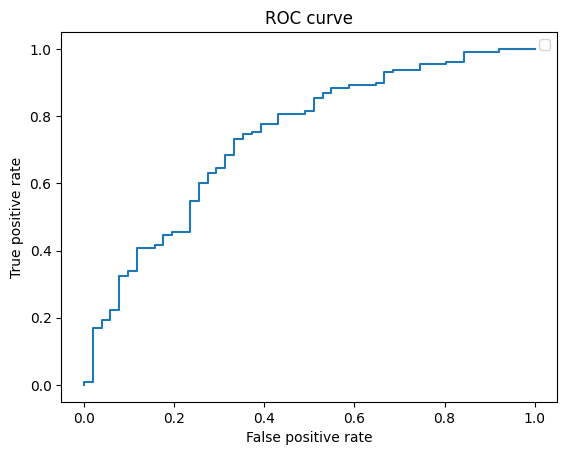

-----------------14th--DeepSVDD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[218   0]
 [  0 502]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    218.0  502.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.752638888888889

 5 fold cv =  0.7468055555555556
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 21  29]
 [ 21 109]]
 ACCURACY SCORE:
0.7222
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.500000    0.789855  0.722222    0.644928      0.709340
reca

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7205555555555556

 RoC AUC Score::  0.7795384615384615


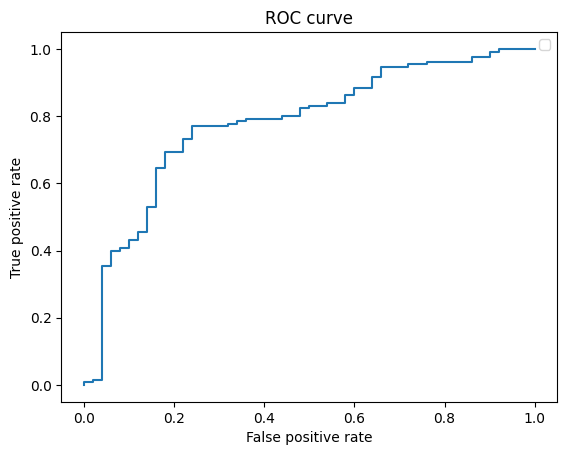

-----------------15th--ALAD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

 CONFUSION MATRIX:
[[225   0]
 [  0 495]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    225.0  495.0       1.0      720.0         720.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7436111111111111

 5 fold cv =  0.746388888888889
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[ 27  19]
 [ 24 110]]
 ACCURACY SCORE:
0.7611
 CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.529412    0.852713  0.761111    0.691062      0.770092
recall  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7683333333333334

 RoC AUC Score::  0.7821219987021414


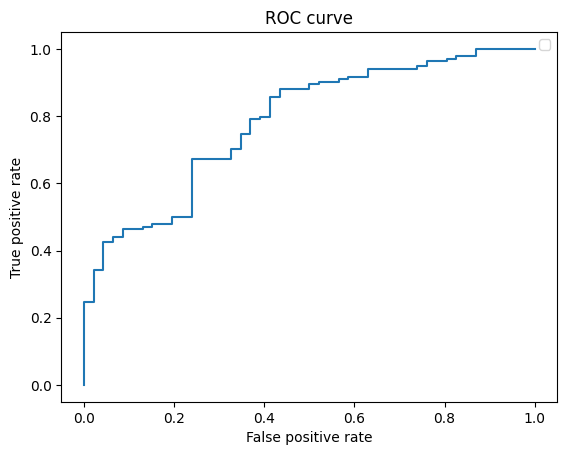

In [37]:
lgbm_clf  = lgbb.LGBMClassifier()
print("-----------------1st--KNN---------------")
lgbm_clf .fit(X_train1, y_train1)
evaluate(lgbm_clf , X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
lgbm_clf .fit(X_train2, y_train2)
evaluate(lgbm_clf , X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
lgbm_clf .fit(X_train3, y_train3)
evaluate(lgbm_clf , X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
lgbm_clf .fit(X_train4, y_train4)
evaluate(lgbm_clf , X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
lgbm_clf .fit(X_train5, y_train5)
evaluate(lgbm_clf , X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
lgbm_clf .fit(X_train6, y_train6)
evaluate(lgbm_clf , X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
lgbm_clf .fit(X_train7, y_train7)
evaluate(lgbm_clf , X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
lgbm_clf .fit(X_train8, y_train8)
evaluate(lgbm_clf , X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
lgbm_clf .fit(X_train9, y_train9)
evaluate(lgbm_clf , X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
lgbm_clf .fit(X_train10, y_train10)
evaluate(lgbm_clf , X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#lgbm_clf .fit(X_train11, y_train11)
#evaluate(lgbm_clf , X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
lgbm_clf .fit(X_train12, y_train12)
evaluate(lgbm_clf , X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
lgbm_clf .fit(X_train13, y_train13)
evaluate(lgbm_clf , X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
lgbm_clf .fit(X_train14, y_train14)
evaluate(lgbm_clf , X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
lgbm_clf .fit(X_train15, y_train15)
evaluate(lgbm_clf , X_train15, X_test15, y_train15, y_test15)